<a href="https://colab.research.google.com/github/SamouchH/Credit-Card-Attrition/blob/main/Credit_Card_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I) Introduction**



Understanding and managing customer churn is critical for the long-term success of a business. Customer attrition leaeds to lost revenue and increased marketing costs as the company strives to acquire new customers. Predicting which customers are most likely to churn can help businesses to target retention efforts more effectively and maintain a more stbal customer base.

##**I.1) Problem statement and objective**

The banking institution we are assisting is experiencing a decline in revenue due to an incresing number of credit card users discontinuing their services. The objective of this project is to :

1. **Understand** the factors leading to customer attrition.
2. **Predict** which customers are most likely to churn in the foreseeable future.

By achieving these objectives, the bank can initiate proactive measures, personalize their communication, and tailor their services to increase customer retention.

##**I.2) Brief about Dataset**

The dataset provided offers a comprehensive view of the bank's clientel, capturing both demographic details and transactional behavior voer a specified period :



*   **Demographics** : Features such as age, gender, marital status, income category, and educational level give insights into the varied customer base of the bank.
*   **Card usage** : Data pn credit limit, revolving balance, transaction count, and amount, among others, paint a picture of how customers utilize their credit cards.
*   **Engagement** : Metrics like the number of relationships with the bank, months of inactivity, and contact count over 12 months help gauge the level of engagement and satisfaction of the customer with the bank's services.

Historical data spans 12 months, up until March '13, with the definition of attrition being any customer clossing their credit card account in the following 6 months (April '13 to October 13')



#**II) Database Handling & EDA**

Data is the ofundation of any data science project. Ensuring its quality, understanding its nuances, and uncovering its patterns is crucial for subsequent analyses and modeling.


##**II.1) Loading the Dataset**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()



Saving Bank_Churn.csv to Bank_Churn.csv


In [ ]:
data = pd.read_csv('Bank_Churn.csv')

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

##**II.2) Basic Data Exploration**

Before diving deep into feature selection, let's get familiar with the dataset's overall character.

*   **Distribution of Target Variable**
Understanding the balance or imbalance in the target variable can guide subsequent modeling decisions.

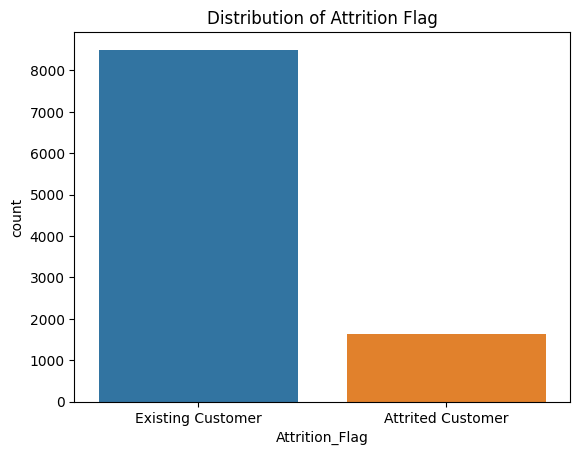

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Attrition_Flag', data=data)
plt.title("Distribution of Attrition Flag")
plt.show()

*   Key Variable Visualization:
After examining the distribution of the 'Attrition_Flag', we delve into visualizing the distribution of other key variables. This is crucial to understand the dataset's characteristics, potential outliers, and any pattern or anomalies.

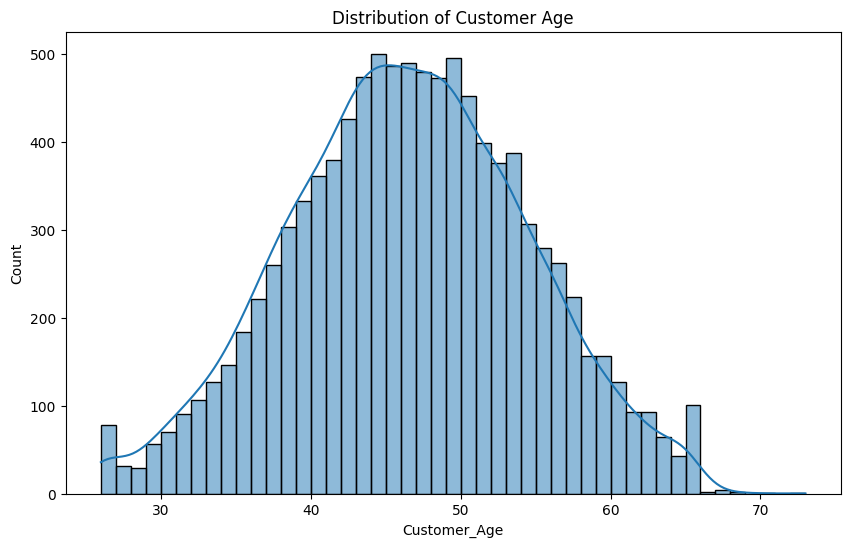

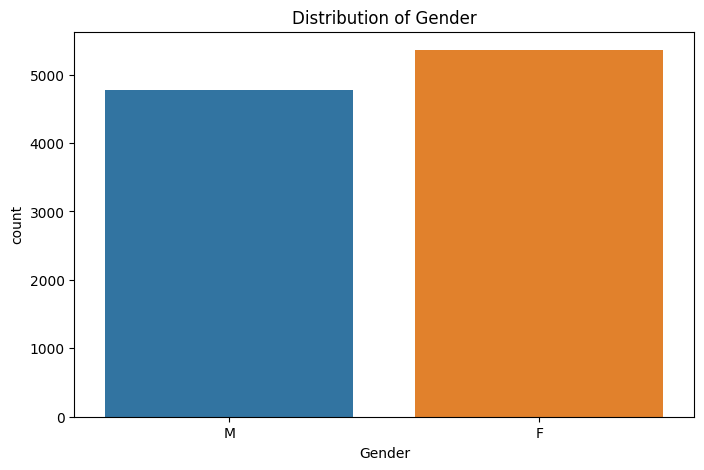

In [ ]:
#Continuous variable example : Customer_Age
plt.figure(figsize=(10,6))
sns.histplot(data['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()

#Categorical variable example : Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

*   Handling missing values

It's essential to ensure the data's completeness before deeper analysis.

In [ ]:
#check for missing values
missing_data = data.isnull().sum()
missing_data_percentage = (data.isnull().sum() / len(data)) * 100
missing_info = pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total Missing', 'Percentage'])
print(missing_info[missing_info['Total Missing']>0])

Empty DataFrame
Columns: [Total Missing, Percentage]
Index: []


*   **Data Summary:**
A comprehensive summary provides insights into the dataset's central tendencies, spread, and potential anomalies.

In [ ]:
#For numerical columns
numerical_summary = data.describe()
print("Numerical Columns Summary:\n", numerical_summary)

#For categorical columns
categorical_summary = data.describe(include=['object', 'category'])
print('\nCategorical Columns Summary:\n', categorical_summary)

Numerical Columns Summary:
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000               

By examining the data summaries, we capture a foundational understanding for our dataset's core attributes:

1. **Numerical column summary:**
    *   This section details key statistics for our numerical features :
       *   **Count** indicates the total entries for each feature.
       *   **Mean & Standard Deviation** provide insights into the data's central tendency and dispersion.
       *   **Min, 25th percentile, Median, 75th percentile, and Max** offer a spectrum of the data distribution, aiding in the detection of potential outliers.

2. **Categorical Columns Summary:**
    *   Here, we outline the characteristics of our categorical attributes:
        *   **Count** ensures data consistency accross attributes.
        *   **Unique** reflects the diversity in categories for each feature.
        *   **Top & Freq** highlights the predominant category and its prevalence.

  These summaries are instrumental in forming ou data-driven decisions and modeling strategies in subsequent stages.

  

rom the table, the features at the top (like `Total_Trans_Ct` and `Total_Ct_Chng_Q4_Q1`) have high F-values, indicating they might be significant in predicting customer attrition. The p-values help validate this: a small p-value (commonly < 0.05) means the differences in means for that feature across different classes are statistically significant.

## **II.3) Outlier Treatment**



As outliers can significantly impact the performance of various machine learning models, outlier treatment is an essential step in data preprocessing.

The general approach to be followed for outlier treatment :

1. **Visualization** : We'll start by visualizing the distribution of each numerical feature, tipically using boxplots, to detect any potential outliers.
2. **Identification** : We'll use statistical methods like the Interquartile Range (IQR) or Z-scres to formally identify outliers.
3. ** Treatment** : Once identifier; there are multiple ways to handel outliers :
    *   **Remove** : simply exclude outlier data points.
    *   **Cap/Floor**: Set a threshold and cap (or floor) values beyond that threshold.
    *   **Transformation** : Apply transformations like log or square root that can reduce the impact of outliers.


Let's begin with the visualization step to identify potential outliers. We'lle create boxplots for the numerical features in the dataset.


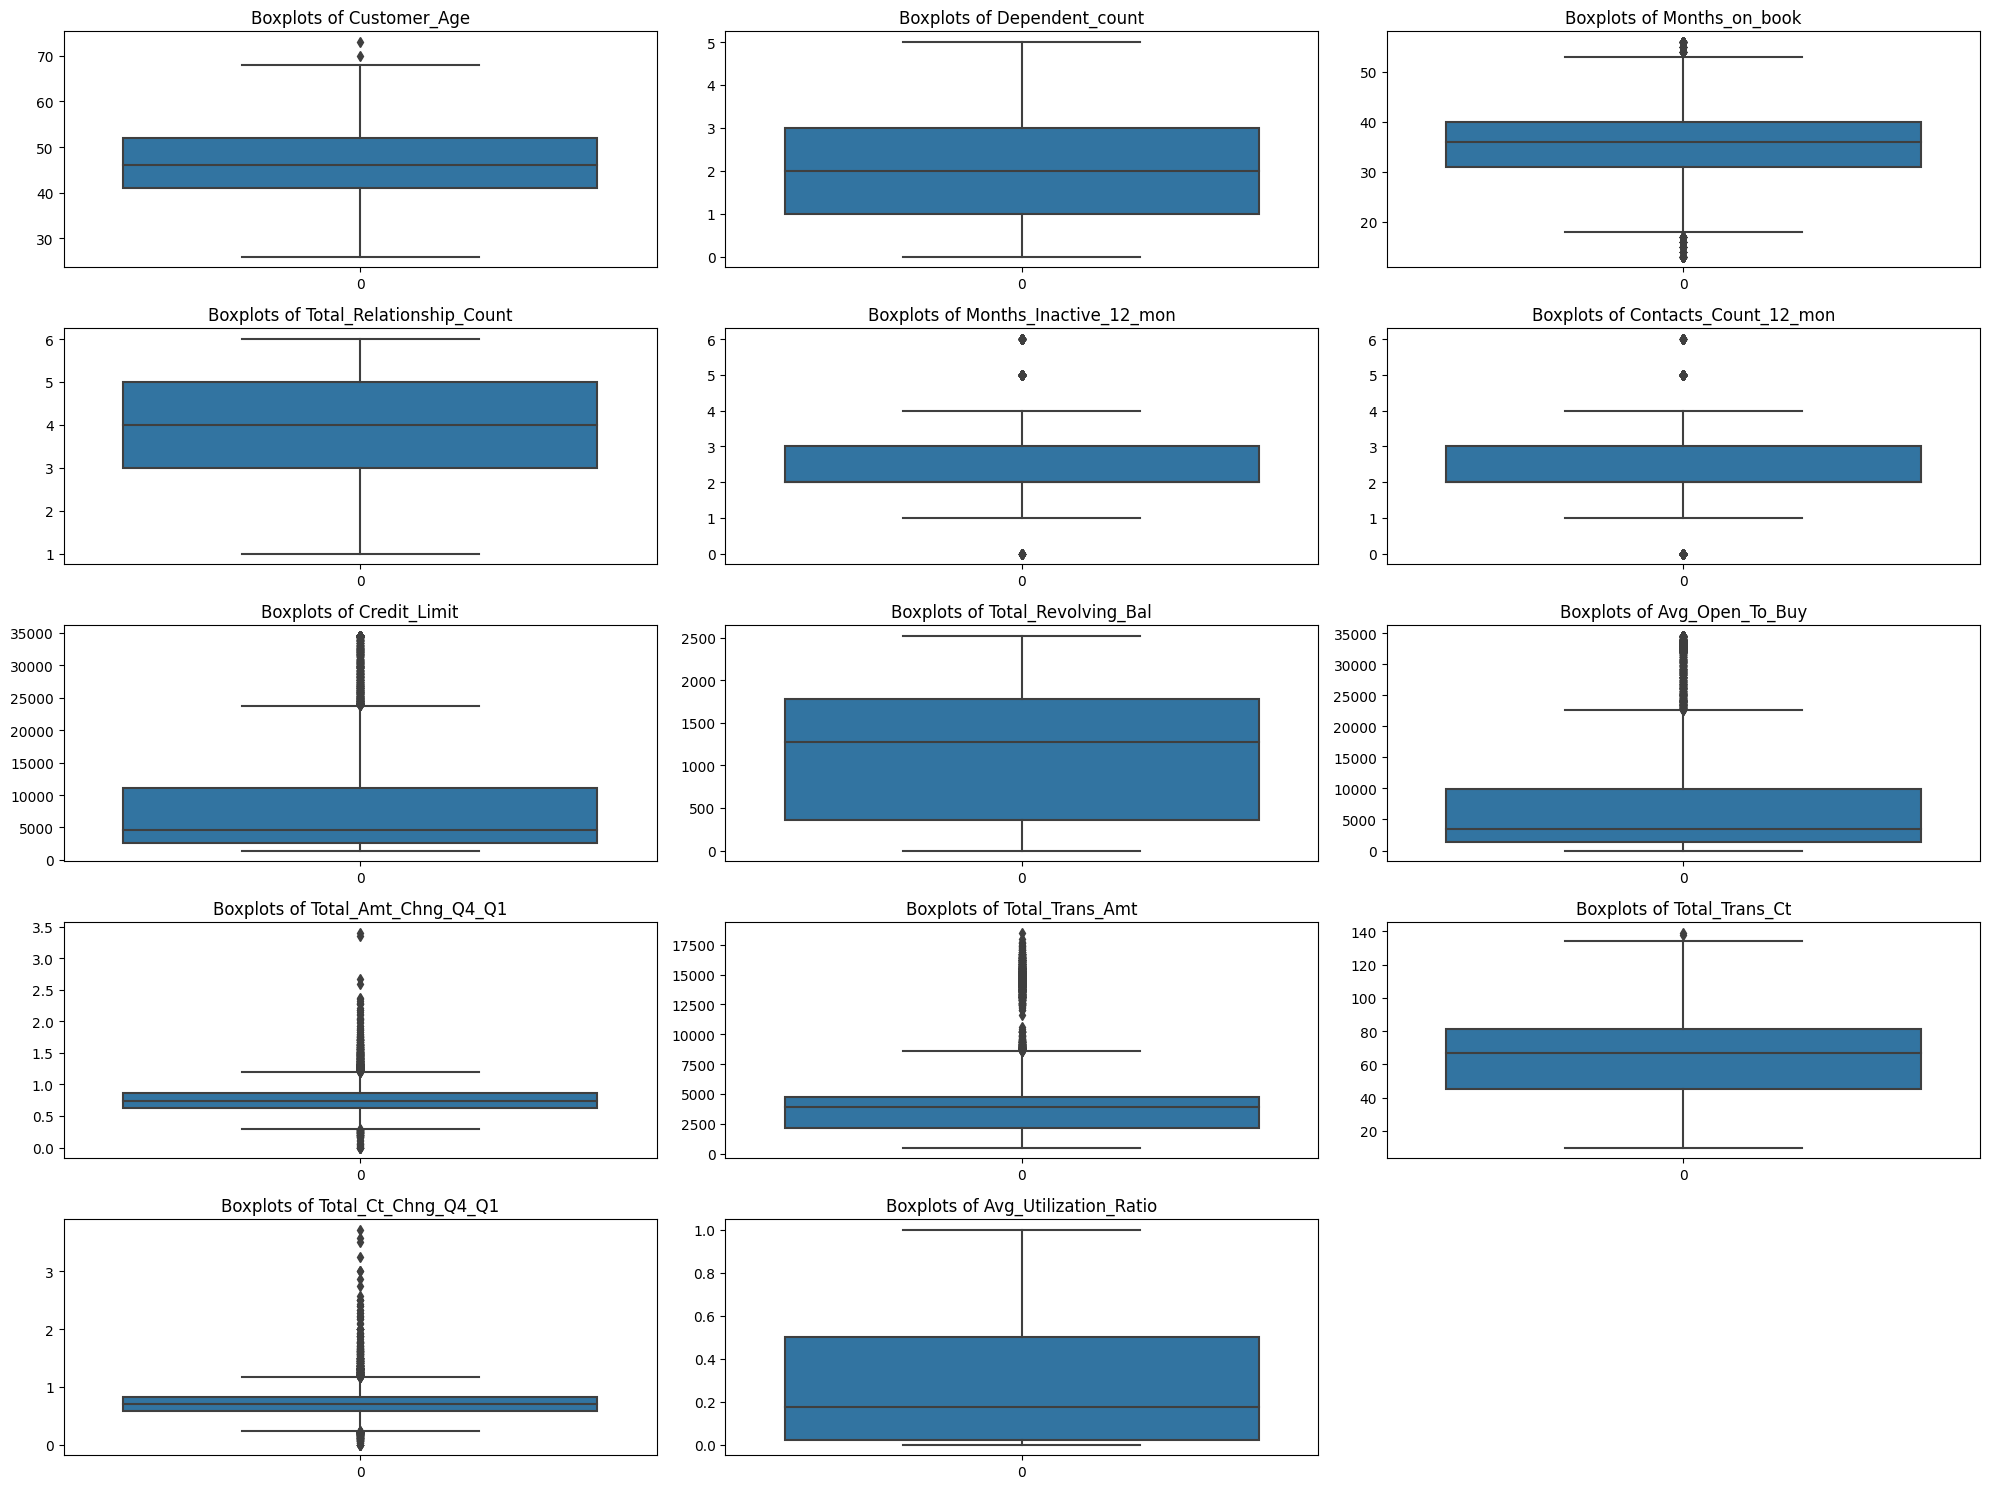

In [ ]:
#Extracting numerical features and plotting the boxplots
numerical_features = data.select_dtypes(include=['float64','int64']).columns

#Removing 'CLIENTNUM' as it's an identifier
numerical_features = [col for col in numerical_features if col != 'CLIENTNUM']

#Visualizing the numerical columns  from the original data
plt.figure(figsize=(20,15))

for i, column in enumerate(numerical_features, 1):
  plt.subplot(5, 3, i)
  sns.boxplot(data=data[column])
  plt.title(f"Boxplots of {column}")


plt.tight_layout()
plt.show()


To treat outliers, there are several common strategies:

1. **Remove Outliers:** If the dataset is large enough and outliers are not the result of a data entry error, simply removing them can be a valid approach.
2. **Impute Outliers:** Replace outlier values with a statistical measure like mean, median, or mode.
3. **Cap or Clip Outliers:** All values above or below a certain threshold are set to a certain maximum or minimum value.
4. **Transform the Feature:** Use techniques like log transformation to reduce the impact of outliers. This is particularly useful when the data has a skewed distribution.
5. **Use Robust Algorithms:** Some machine learning algorithms are less sensitive to outliers. If you expect to have outliers in your real-world data, it might be worth considering such algorithms.


---

### **Treating Outliers using the Interquartile Range (IQR)**

The Interquartile Range (IQR) is a measure of statistical spread and is calculated as:

$$
\text{IQR} = Q3 - Q1
$$

Where:
- $Q1$ is the first quartile (25th percentile).
- $Q3$ is the third quartile (75th percentile).

Outliers are typically defined as values that fall below $$Q1 - 1.5 \times \text{IQR}$$ or above $$Q3 + 1.5 \times \text{IQR}$$. We'll treat these outliers by replacing them with the median of the respective feature.


In [ ]:
import numpy as np

#Function to treat outliers using IQR
def treat_outliers_using_iqr(df, column):
  #Calculating IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  #Defining bounds
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  #Replacing outliers with median
  df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
  df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])



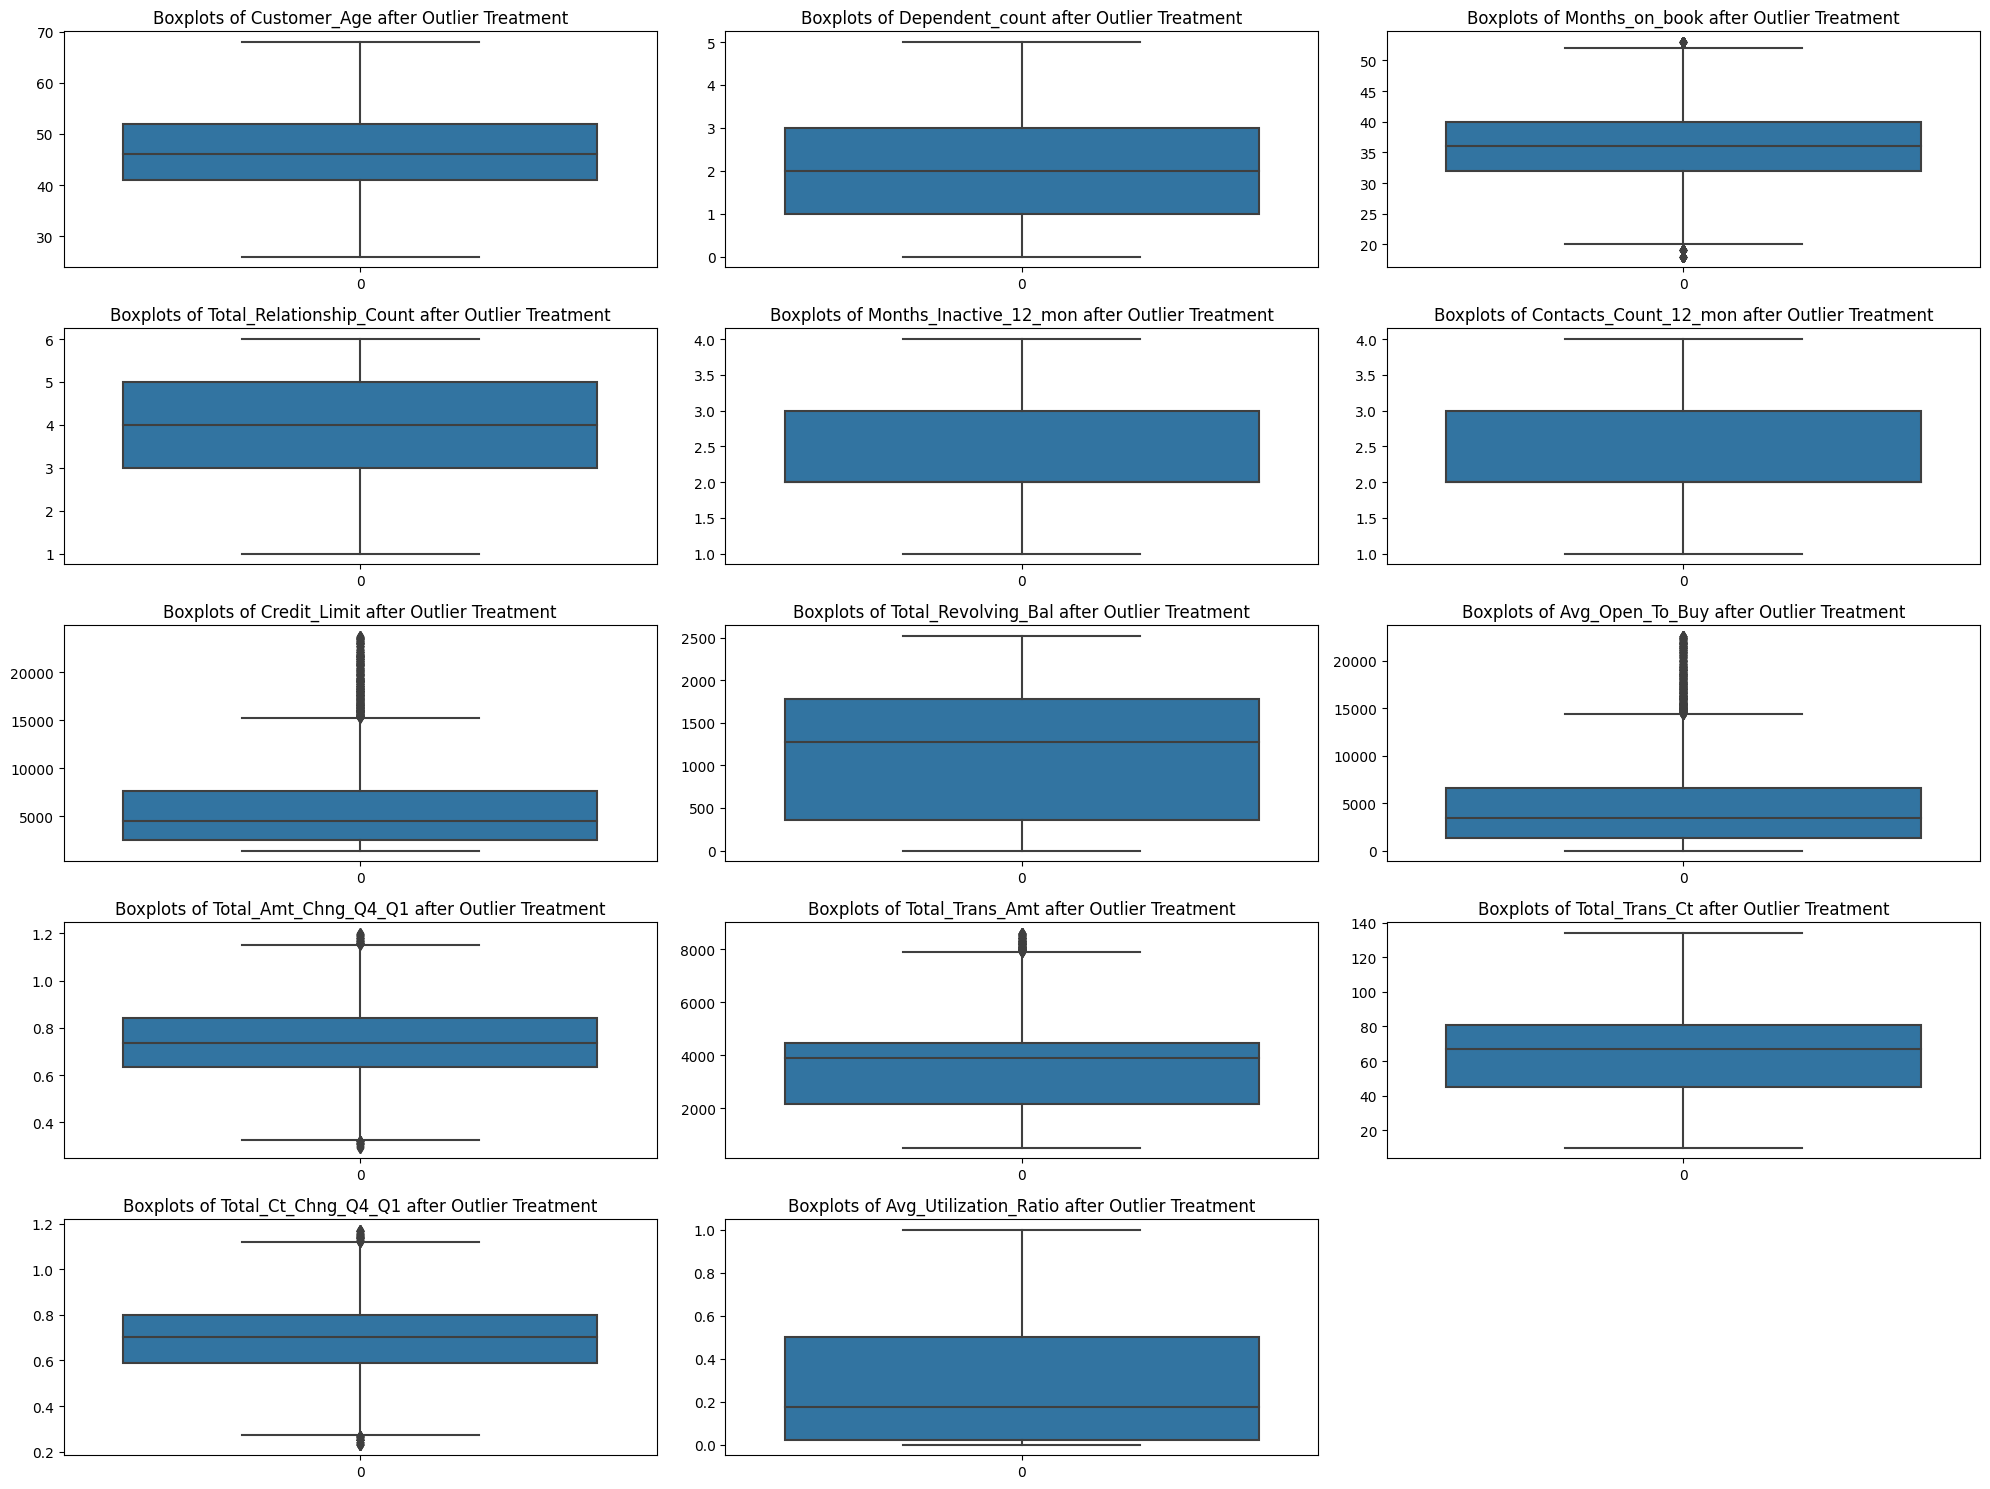

In [ ]:
#Aplying the function to each of the numerical features to treat outliers
for feature in numerical_features :
  treat_outliers_using_iqr(data,feature)

#Checking back the outliers after outlier treatment
plt.figure(figsize=(20,15))

for i, column in enumerate(numerical_features, 1):
  plt.subplot(5, 3, i)
  sns.boxplot(data=data[column])
  plt.title(f"Boxplots of {column} after Outlier Treatment")


plt.tight_layout()
plt.show()


## II.4 Data Preprocessing



1. **Encoding Categorical Variables**: Many machine learning algorithms require input features to be numerical. If your dataset contains categorical variables, you'll need to convert them to a numerical format. Common methods include:
   - One-Hot Encoding
   - Label Encoding
   - Binary Encoding

2. **Handling Missing Values**: Ensure that there are no missing values in the dataset or decide how to handle them if there are any. Strategies include:
   - Removing rows or columns with missing values.
   - Imputation using mean, median, mode, or more advanced techniques like KNN imputation.

3. **Feature Scaling**: Some algorithms (like K-NN, SVM, and neural networks) are sensitive to feature scales. Depending on the data and the model, you might need to:
   - Normalize: Scales features to have values between 0 and 1.
   - Standardize: Scales features to have a mean of 0 and a standard deviation of 1.


We'll start with :
###1. **Encoding Categorical Variables**

In [ ]:
#Identify categorical columns excluding "Attirtion_Flag" as it is our target variable
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns.tolist()]

#One-Hot Encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded=data_encoded.drop('CLIENTNUM', axis=1)
#Displaying the shape and the first few rows of the encoded data
data_encoded_shape = data_encoded.shape
data_encoded_head = data_encoded.head()

data_encoded.columns
data_encoded_shape, data_encoded_head

((10127, 33),
    Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
 0          45.0              3.0            39.0                       5.0   
 1          49.0              5.0            44.0                       6.0   
 2          51.0              3.0            36.0                       4.0   
 3          40.0              4.0            34.0                       3.0   
 4          40.0              3.0            21.0                       5.0   
 
    Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
 0                     1.0                    3.0       12691.0   
 1                     1.0                    2.0        8256.0   
 2                     1.0                    2.0        3418.0   
 3                     4.0                    1.0        3313.0   
 4                     1.0                    2.0        4716.0   
 
    Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
 0                777.0          11

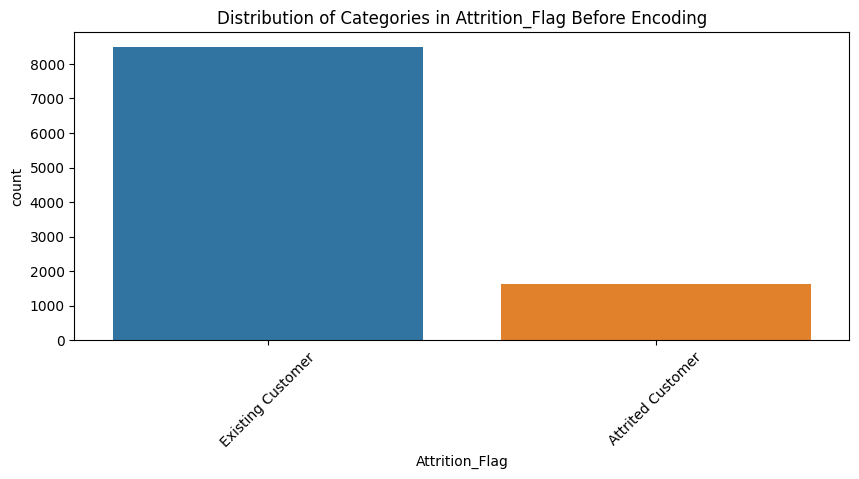

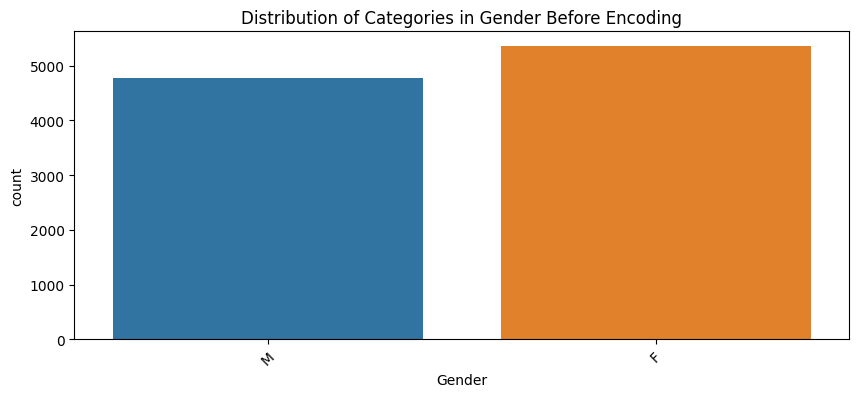

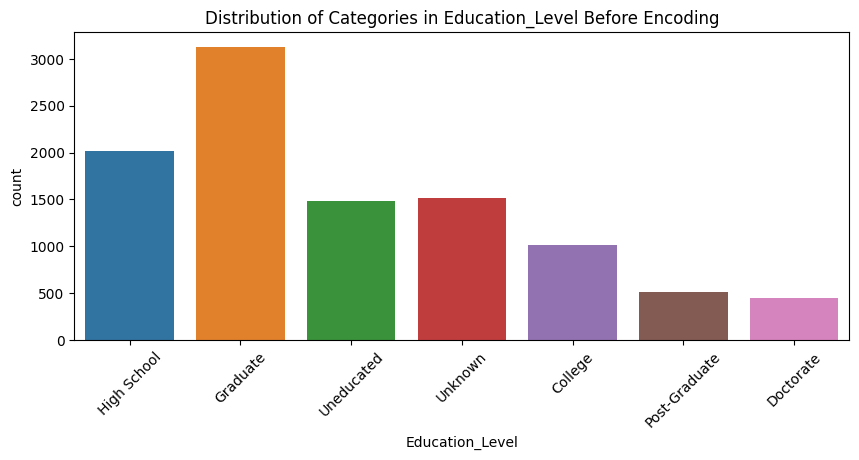

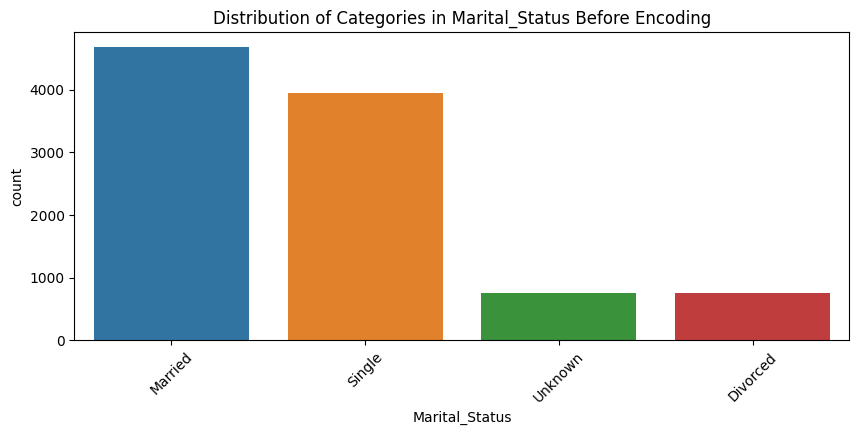

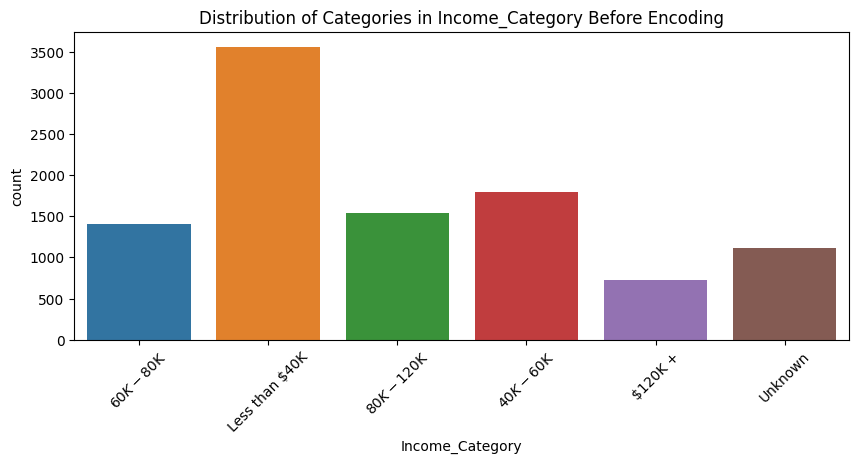

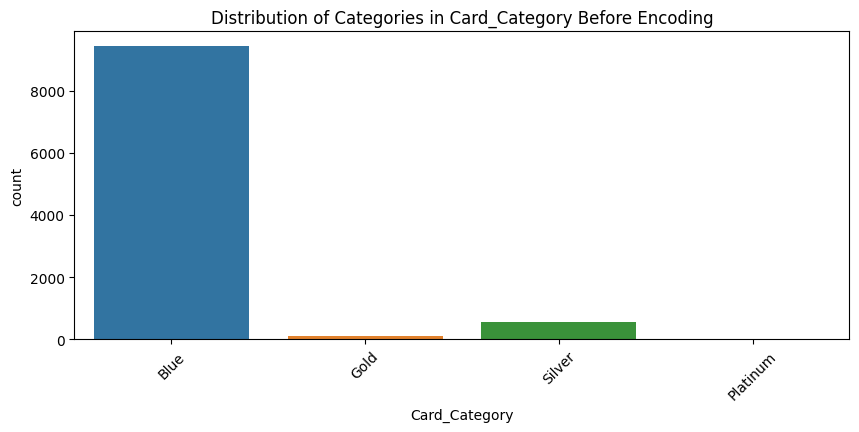

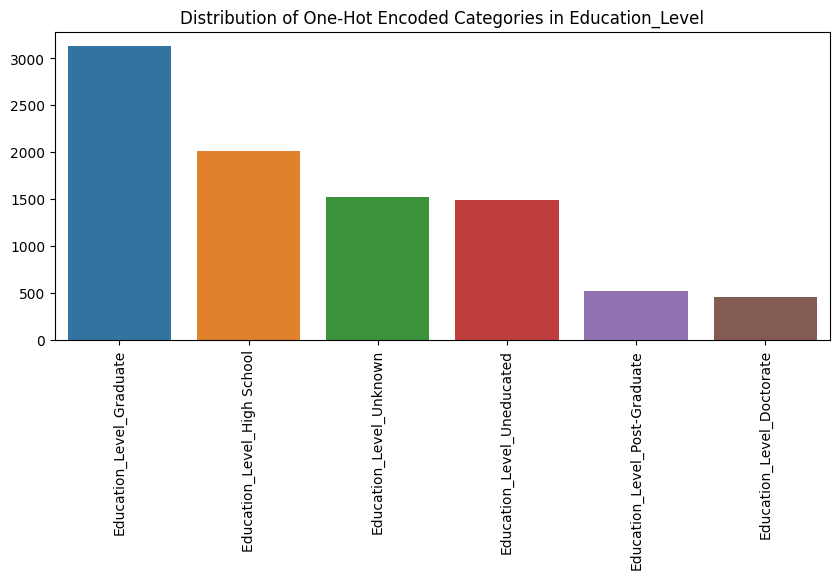

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original dataframe before encoding
# 'categorical_columns' are the categorical columns identified before encoding

# Display the count of each category within each categorical variable before encoding
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of Categories in {col} Before Encoding')
    plt.xticks(rotation=45)
    plt.show()

# For post-encoding visualization, find the categorical column with the most categories
# We will visualize this column as an example
# Assuming 'data_encoded' is the dataframe after one-hot encoding
# 'categorical_columns' are the categorical columns identified before encoding
max_categories_col = max(categorical_columns, key=lambda col: data[col].nunique())

# Display the count of each new encoded category for the chosen column
encoded_cols = [col for col in data_encoded.columns if col.startswith(max_categories_col)]
encoded_counts = data_encoded[encoded_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=encoded_counts.index, y=encoded_counts.values)
plt.title(f'Distribution of One-Hot Encoded Categories in {max_categories_col}')
plt.xticks(rotation=90)
plt.show()


We've successfully one-hot encoded the categorical variables in the dataset.

The dataset now has 34 columns. For each categorical variable, we've created new columns (or "dummy variables") that represent the categories with a binary value of 0 or 1. This is done to make the dataset suitable for machine learning algorithms that require numerical input, such as logistic regression or k-nearest neighbors.

For example, the Card_Category column, which originally contained values like "Gold", "Silver", etc., has been transformed into multiple columns like Card_Category_Gold, Card_Category_Silver, etc., where each column represents the presence (1) or absence (0) of a particular category.

###2. Handling missing values

This part is to be skipped since there are no missing values


### 3.feature scaling.



There are two common ways to scale features:

1. **Normalization (Min-Max Scaling)**: This scales and transforms features to lie between a given minimum and maximum value, often between zero and one. The formula is:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

2. **Standardization (Z-score Normalization)**: This scales features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. The formula is:

$$
X_{\text{std}} = \frac{X - \mu}{\sigma}
$$

where $ \mu $ is the mean and $ \sigma $ is the standard deviation.

For most machine learning algorithms, especially those based on distance metrics (like K-NN) or gradient descent (like linear regression, logistic regression, and neural networks), standardization is preferred.

Let's standardize the numerical features in our dataset. We'll exclude the one-hot encoded features and the target variable 'Attrition_Flag'.



In [ ]:
from sklearn.preprocessing import StandardScaler
#List of numerical columns
numerical_features = data_encoded.select_dtypes(exclude=['uint8']).columns.tolist()


#Initialize the StandardScaler
scaler = StandardScaler()

#Apply scaling on the data
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

#Display the first few rows of the standardized data
data_encoded_head = data_encoded.head()

data_encoded_head

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.164939,0.503368,0.440342,0.763943,-1.475710,0.595831,1.338768,-0.473422,1.384690,-0.009485,...,0,0,0,1,0,0,0,0,0,0
1,0.334526,2.043199,1.161428,1.407306,-1.475710,-0.508889,0.450297,-0.366667,0.492454,-0.009485,...,1,0,0,0,0,1,0,0,0,0
2,0.584258,0.503368,0.007690,0.120579,-1.475710,-0.508889,-0.518908,-1.426858,-0.291657,-0.009485,...,0,0,0,0,1,0,0,0,0,0
3,-0.789269,1.273283,-0.280744,-0.522785,2.079686,-1.613608,-0.539943,1.661686,-0.809004,-0.009485,...,0,1,0,0,0,1,0,0,0,0
4,-0.789269,0.503368,-2.155569,0.763943,-1.475710,-0.508889,-0.258878,-1.426858,-0.035548,-0.009485,...,0,0,0,1,0,0,0,0,0,0


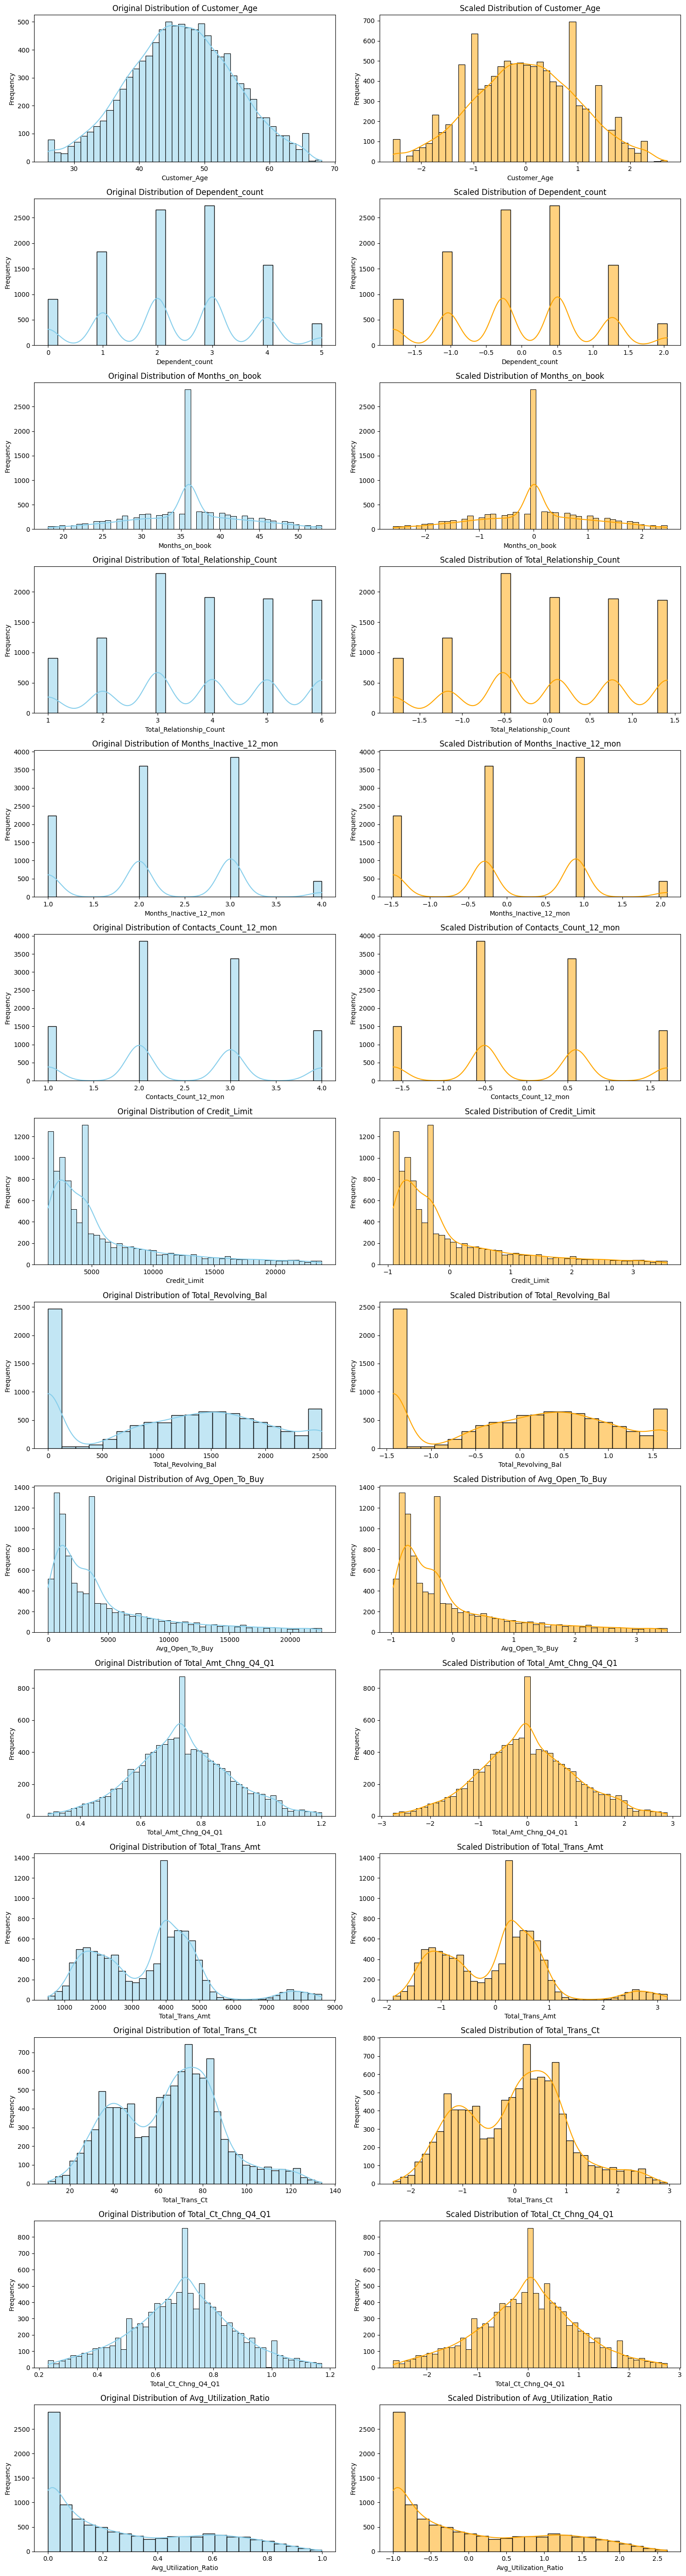

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the original and scaled distributions side by side
num_plots = len(numerical_features)
plt.figure(figsize=(15, 4 * num_plots))

for i, col in enumerate(numerical_features, 1):
    # Original distribution plot from 'data'
    plt.subplot(num_plots, 2, 2 * i - 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Original Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Scaled distribution plot from 'data_encoded'
    plt.subplot(num_plots, 2, 2 * i)
    sns.histplot(data_encoded[col], kde=True, color='orange')
    plt.title(f'Scaled Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


We've successfully standardized the numerical features in our dataset.

As we can observe:
- The numerical features now have a mean of approximately 0 and a standard deviation of approximately 1.
- The one-hot encoded categorical variables and the target variable `Attrition_Flag` remain unchanged.

Standardizing the features ensures that they're on a uniform scale, which is particularly beneficial for algorithms sensitive to feature magnitude, like k-Nearest Neighbors, SVMs, and gradient descent-based algorithms.



First, we'll proceed by selecting the features based on the work we did in the feature selection part.

## II.5) Feature Selection



In our quest to understand and predict customer churn, we delved deeply into the realm of feature selection. Through rigorous methods, we aimed to pinpoint the variables most influential in determining attrition. Starting with the **Pearson Correlation Coefficient**, we gauged linear relationships between features and the target. We then harnessed the power of **Random Forest** to assign importance scores based on features' roles in the decision trees. To further refine our selections, we employed **ANOVA F-values** to rank features based on their variance between groups, highlighting their discriminatory power. Lastly, Recursive Feature Elimination (RFE) with RandomForest allowed for an iterative pruning of the least important features, ensuring that our final selection was both robust and relevant. As a culmination of these efforts, variables like `Total_Trans_Ct`, `Total_Trans_Amt`, and `Total_Revolving_Bal` consistently emerged as paramount, affirming their significance in our predictive modeling endeavors.

Identifying pertinent features is paramount to ensure optimal model performance while avoiding unnecessary computational costs and the risk of overfitting.



###   **II.5.1 Pearson Correlation Coeeficient:**


*   Measures the linear relaionship between two continuous variables.

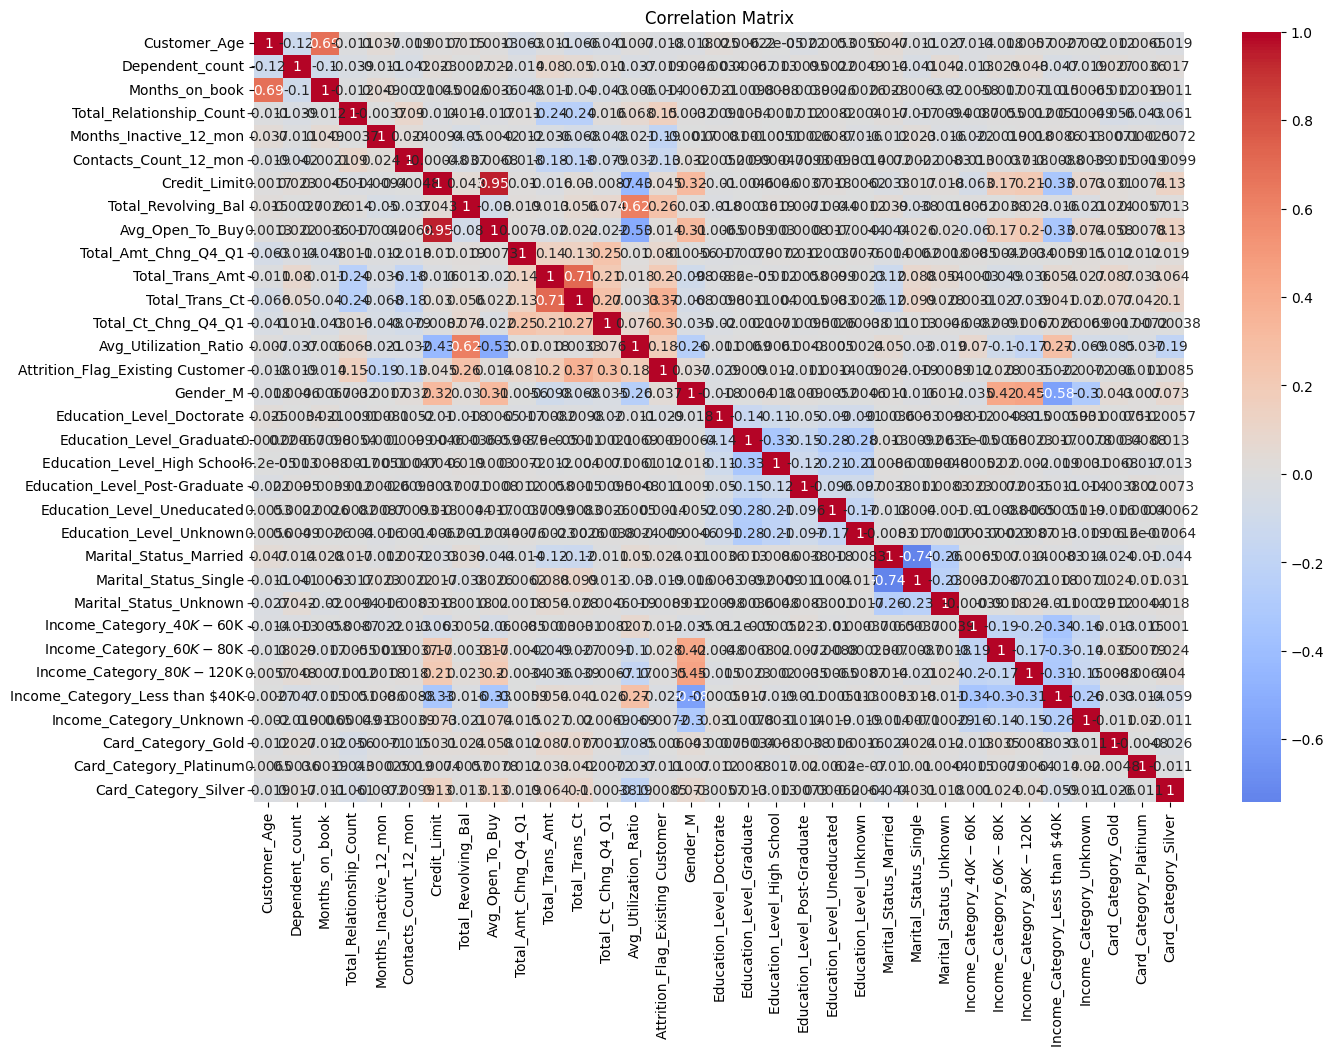

In [ ]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

###  **II.5.2 Feature Importance with Random Forest:**


  *  In the intricate tapestry of data, certain threads stand out, significantly influencing the outcome of our predictions. Random Forest, a machine learning technique, offers a unique lens to discern these threads, or in data parlance, "features."

**Principle Behind Feature Importance in Random Forest**:
Imagine a council of decision-makers, each evaluating factors and casting votes on an outcome. In Random Forest, these decision-makers are decision trees. Each tree assesses features and their influence on predictions. The more frequently and decisively a feature is used by these trees, the higher its deemed importance.

This decision-making is quantified using the Gini impurity. It measures the disorder or mix within a set of data. For each feature, the Random Forest calculates how much using that feature decreases this disorder across all trees. The formula, without delving deep into the math, looks like this:

$$
\text{Importance}(f) = \text{Total Disorder Before Using Feature} - \text{Total Disorder After Using Feature}
$$



**Findings from Our Analysis**:
Our exploration revealed certain standout features:
- `Total_Trans_Amt`: The total amount transacted by a customer.
- `Total_Trans_Ct`: The total number of transactions made.
- `Total_Revolving_Bal`: The total revolving balance on the credit card.

These features are pivotal in understanding customer behavior and predicting attrition. Conversely, features like `Gender` and `Card_Category` had lesser sway in the decision-making process.

For a bank or any business, grasping these influential factors means better-targeted strategies, paving the way for enhanced customer retention.

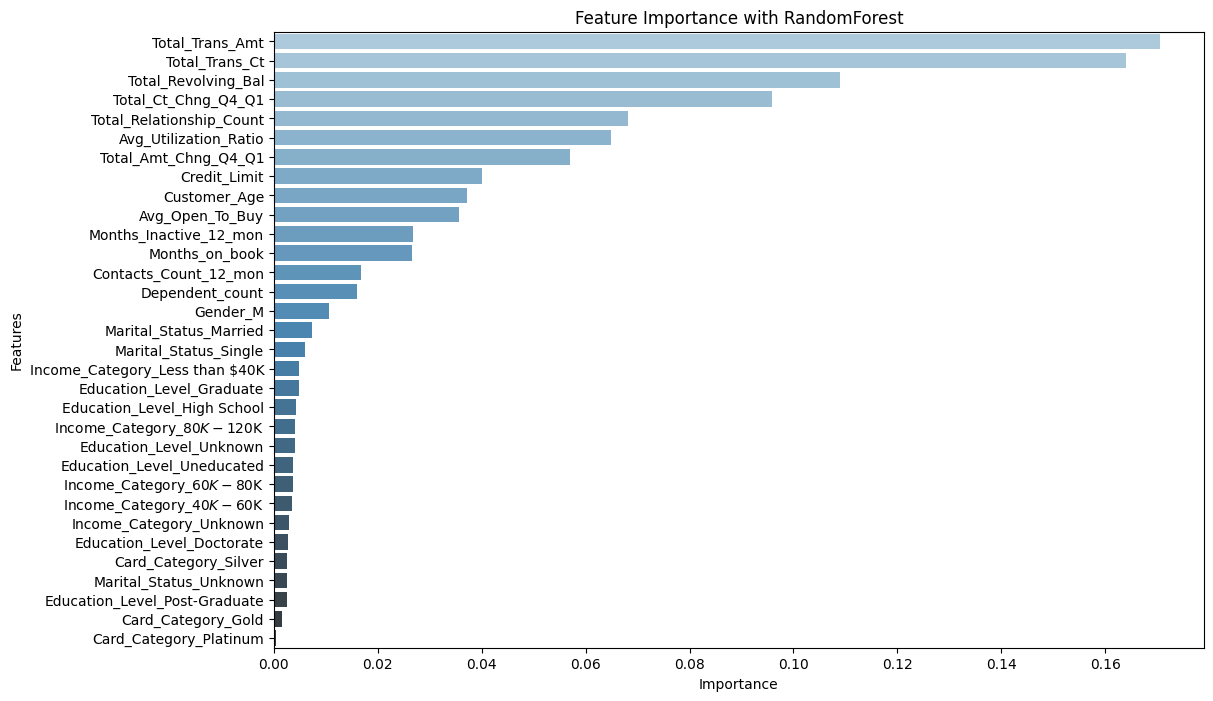

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#Using the one-hot encoded data
X = data_encoded.drop(columns=['Attrition_Flag_Existing Customer'])
y = data_encoded['Attrition_Flag_Existing Customer']

#Fitting Random Forest
clf= RandomForestClassifier(random_state=42)
clf.fit(X, y)

#Extracting feature importance
feature_importance = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Features': features, 'Importance':feature_importance}).sort_values(by='Importance',ascending=False)

#Plotting feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Features', data=importance_df, palette="Blues_d")
plt.title("Feature Importance with RandomForest")
plt.show()

### **II.5.3 ANOVA F-value:**



ANOVA (Analysis of Variance) is a statistical method used to test differences between two or more means. When utilized in the context of feature selection, ANOVA provides a way to check if there are any statistically significant differences in the means of a feature's values across different classes in the target variable.

Mathematically, the F-value in ANOVA is calculated as:

$$
F = \frac{\text{Between group variability}}{\text{Within group variability}}
$$

In simpler terms:

- **Between group variability** measures how much the means of each group (or class) differ from the overall mean.
- **Within group variability** measures how much individual observations in each group differ from their respective group mean.

A high F-value indicates that the feature has a strong correlation with the output variable, as the means of that feature's values vary significantly across different classes. Conversely, a low F-value suggests that the feature is not as informative in predicting the output variable.

Additionally, the p-value associated with each F-value tests the null hypothesis that the means of the different groups are the same. A small p-value (typically ≤ 0.05) indicates that you can reject the null hypothesis and that the feature is likely important in predicting the target variable.


In [ ]:
from sklearn.feature_selection import f_classif

#Compute ANOVA F-values
f_values, p_values = f_classif(X, y)

#Creating a DataFrame for visualization
anova_df = pd.DataFrame({
    'Features':X.columns,
    'F-values':f_values,
    'p_values':p_values
}).sort_values(by='F-values', ascending=False).reset_index(drop=True)

#Displaying the top features based on F-values
anova_df.head(10)

,Features,F-values,p_values
0,Total_Trans_Ct,1621.112266,0.000000e+00
1,Total_Ct_Chng_Q4_Q1,1023.664670,4.613146e-214
2,Total_Revolving_Bal,752.702408,6.630148e-160
3,Total_Trans_Amt,413.572969,3.808505e-90
4,Months_Inactive_12_mon,367.277549,1.928110e-80
5,Avg_Utilization_Ratio,332.876795,3.357689e-73
6,Total_Relationship_Count,233.072886,4.829281e-52
7,Contacts_Count_12_mon,187.174162,3.120738e-42
8,Total_Amt_Chng_Q4_Q1,67.692522,2.145791e-16
9,Credit_Limit,20.649634,5.578644e-06


###   **II.5.4. Recursive Feature Elimintation (RFE)**



Recursive Feature Elimination, or RFE, is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. It aims to select features by recursivelt considering smaller and smaller sets of features.

**How it works:

1. Train a model on the entire set of features.
2. Rank features based on their importance, derived from the model.
3. Remove the least important feature(s)
4. Repeat the process with the reamining features.

While we initially leveraged RandomForest to gauge feature importances, employing RFE offers a nuanced perspective. By iteratively training the RandomForest on a reduced feature set, RFE provides a dynamic re-evaluation of feature significance, capturing subtleties that a single-pass assessment might overlook. This iterative approach reinforces our confidence in the identified important features, ensuring robustness in our selection process.

*N.B.1* By eliminating less important features, RFE helps in reducing overfitting, improving accuracy, and boosting the performance of the model.


In [ ]:
from sklearn.feature_selection import RFE

#Initializing the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator= model, n_features_to_select=10)

#Fitting RFE on the data
fit = rfe.fit(X, y)

#Extracting and displaying the top features
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking' : fit.ranking_,
    'Selected' : fit.support_
}).sort_values(by='Ranking').reset_index(drop=True)

selected_features.head(10)

,Feature,Ranking,Selected
0,Customer_Age,1,True
1,Avg_Utilization_Ratio,1,True
2,Total_Trans_Ct,1,True
3,Total_Trans_Amt,1,True
4,Total_Amt_Chng_Q4_Q1,1,True
5,Avg_Open_To_Buy,1,True
6,Total_Revolving_Bal,1,True
7,Total_Ct_Chng_Q4_Q1,1,True
8,Total_Relationship_Count,1,True
9,Credit_Limit,1,True


In [ ]:
#Extracting top features from each method

#From Pearson Correlation
## Calculate correlations of each feature with the target
correlations = correlation_matrix['Attrition_Flag_Existing Customer'].drop('Attrition_Flag_Existing Customer')

## Get the absolute values of correlations
absolute_correlations = correlations.abs()

## Get the top 10 features with the highest absolute correlation with the target
top_features_pearson = absolute_correlations.nlargest(10).index.tolist()

#From Random Forest Feature Importance
rf_top_features = importance_df["Features"].head(10).tolist()

#From ANOVA F-value
anova_top_features = anova_df["Features"].head(10).tolist()

#From RFE
rfe_top_features = selected_features["Feature"].head(10).tolist()

#Selecting all the top features
from collections import Counter

# Count the frequency of each feature in the combined list
feature_counts = Counter(top_features_pearson + rf_top_features + anova_top_features + rfe_top_features)

# Sort features by the most common and then alphabetically
sorted_features = sorted(feature_counts.items(), key=lambda item: (-item[1], item[0]))

# Take the top 10 most common features
all_top_features = [feature for feature, count in sorted_features[:10]]

#Consolidating all top features
#all_top_features = list(set(top_features_pearson + rf_top_features + anova_top_features + rfe_top_features))

all_top_features


['Avg_Utilization_Ratio',
 'Credit_Limit',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Open_To_Buy',
 'Contacts_Count_12_mon']

In [ ]:
# Assuming the following lists contain the top features from each method
# top_features_pearson, rf_top_features, anova_top_features, rfe_top_features

# Creating a DataFrame to display the top features from each method
feature_summary_df = pd.DataFrame({
    'Pearson Correlation': pd.Series(top_features_pearson),
    'Random Forest Importance': pd.Series(rf_top_features),
    'ANOVA F-value': pd.Series(anova_top_features),
    'RFE': pd.Series(rfe_top_features)
})

# Display the DataFrame as a table
feature_summary_df


,Pearson Correlation,Random Forest Importance,ANOVA F-value,RFE
0,Total_Trans_Ct,Total_Trans_Amt,Total_Trans_Ct,Customer_Age
1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,Total_Revolving_Bal,Total_Revolving_Bal,Total_Revolving_Bal,Total_Trans_Ct
3,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Amt
4,Months_Inactive_12_mon,Total_Relationship_Count,Months_Inactive_12_mon,Total_Amt_Chng_Q4_Q1
5,Avg_Utilization_Ratio,Avg_Utilization_Ratio,Avg_Utilization_Ratio,Avg_Open_To_Buy
6,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal
7,Contacts_Count_12_mon,Credit_Limit,Contacts_Count_12_mon,Total_Ct_Chng_Q4_Q1
8,Total_Amt_Chng_Q4_Q1,Customer_Age,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count
9,Credit_Limit,Avg_Open_To_Buy,Credit_Limit,Credit_Limit


In [ ]:
import dataframe_image as dfi

# Assuming you have a DataFrame named 'feature_summary_df' as created previously
styled_df = feature_summary_df.style.set_table_styles(
    [dict(selector="th", props=[("font-size", "14pt"), ("background-color", "lightblue"), ("color", "black")]),
     dict(selector="td", props=[("font-size", "12pt")]),
     dict(selector="caption", props=[("caption-side", "top"), ("font-size", "16pt"), ("color", "black")])
    ]
).set_properties(**{'text-align': 'left'}).set_caption("Top Features from Different Feature Selection Methods")

# Save the styled DataFrame to an image file
dfi.export(styled_df, 'feature_selection_table_dfi.png', table_conversion='matplotlib')


In [ ]:
# Create or update our DataFrame with the top features from each selection method
feature_summary_df_2 = pd.DataFrame({
    'Pearson Correlation': top_features_pearson,
    'Random Forest Importance': rf_top_features,
    'ANOVA F-value': anova_top_features,
    'RFE': rfe_top_features,
    'Selected Features': all_top_features  # The consolidated list of top features
})

# Style the DataFrame
styled_df_2 = feature_summary_df_2.style.set_table_styles(
    [dict(selector="th", props=[("font-size", "14pt"), ("background-color", "lightblue"), ("color", "black")]),
     dict(selector="td", props=[("font-size", "12pt")]),
     dict(selector="caption", props=[("caption-side", "top"), ("font-size", "16pt"), ("color", "black")])
    ]
).set_properties(**{'text-align': 'left'}).set_caption("Top Features from Different Feature Selection Methods")

# Export the styled DataFrame to an image file
dfi.export(styled_df_2, 'feature_selection_table_dfi_with_selected_features.png', table_conversion='matplotlib')

styled_df_2

,Pearson Correlation,Random Forest Importance,ANOVA F-value,RFE,Selected Features
0,Total_Trans_Ct,Total_Trans_Amt,Total_Trans_Ct,Customer_Age,Avg_Utilization_Ratio
1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit
2,Total_Revolving_Bal,Total_Revolving_Bal,Total_Revolving_Bal,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1
3,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1
4,Months_Inactive_12_mon,Total_Relationship_Count,Months_Inactive_12_mon,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count
5,Avg_Utilization_Ratio,Avg_Utilization_Ratio,Avg_Utilization_Ratio,Avg_Open_To_Buy,Total_Revolving_Bal
6,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt
7,Contacts_Count_12_mon,Credit_Limit,Contacts_Count_12_mon,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct
8,Total_Amt_Chng_Q4_Q1,Customer_Age,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Avg_Open_To_Buy
9,Credit_Limit,Avg_Open_To_Buy,Credit_Limit,Credit_Limit,Contacts_Count_12_mon


# Data Splitting

The commong practise is to allocate around 70-80% of the data for training and the remaining 20-30% for testing. Here, we'll use 75% for training and 25% for testing.

In [ ]:
data_encoded.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

#Define the features and target variable
X =  data_encoded[all_top_features]
y = data_encoded['Attrition_Flag_Existing Customer']

#Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Displaying the shape of the training and testing data
X_train_shape, X_test_shape, y_train_shape, y_test_shape = X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train_shape, X_test_shape,y_train_shape, y_test_shape

((7595, 10), (2532, 10), (7595,), (2532,))

# III)Model Training

plan :

1. **Exploratory Model Training**: We started with a simple model, Logistic Regression, to set a baseline.
2. **Advanced Models**:
    - Decision Trees
    - Random Forest
    - Support Vector Machines (SVM)
    - K-Nearest Neighbors (KNN)

3. **Complex Models**:    
    - XGBoost
    - CatBoost
    - LightGBM

4. **Hyperparameter Tuning**: For the models that perform well, we can demonstrate hyperparameter tuning to optimize them further.
5. **Model Interpretability**: Once we've selected a top-performing model,we delve into model interpretability tools.
6. **Ensemble & Boosting**: Introduce ensemble methods or other boosting algorithms.
7. **Evaluation**: Evaluate all models on the same metric(s) and compare their performances.


## III.1.) Exploratory Model Training: Logistic Regression

Let's start with the simplest model, Logistic Regression, to set a baseline. This will help us gauge how our data behaves with a linear model and gives us a performance benchmark against which we can compare more complex models.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

#Make predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

#Evaluate the model's accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_lr = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy_lr

(0.8969058591178407, 0.8925750394944708)

##III.2.) Advanced Models

###  1.Advanced Models : Decision Trees

Decision Trees are a type of model that makes decision based on asking a series of questions. They are intuitive, easy to visualize, and are the building blocks of more sophisticated models like Random Forests, Let's start with a basic Deisison Tree model :
    1. Train a decision tree classifier
    2. Evaluate its performanc on the training and testing datasets


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

#Fit the model on training data
dt_classifier.fit(X_train, y_train)

#Predict on trainingg and testing data
y_train_pred_dt = dt_classifier.predict(X_train)
y_test_pred_dt = dt_classifier.predict(X_test)

#Evaluate the model
print("Training Accuracy: ", accuracy_score( y_train, y_train_pred_dt))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred_dt))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_dt))

Training Accuracy:  1.0
Testing Accuracy:  0.9162717219589257

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       419
           1       0.95      0.95      0.95      2113

    accuracy                           0.92      2532
   macro avg       0.85      0.84      0.85      2532
weighted avg       0.91      0.92      0.92      2532



In [ ]:
import pandas as pd
import dataframe_image as dfi
from sklearn.metrics import classification_report

# Generate classification report for Decision Tree model
report_dict_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)
report_df_dt = pd.DataFrame(report_dict_dt).transpose()

# Save the classification report as an image
dfi.export(report_df_dt, 'classification_report_dt.png',table_conversion='matplotlib')


### 2. Advanced Models : Random Forest

Random Forest is an ensemble method that trains multiple decision tees and aggregates their results. The idea is that by combining the output of multiple "weak" models, we can create a more robust and accurate "strong" model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

#Training the model
rf_classifier.fit(X_train,y_train)

#Predicting on the training and testing data
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

#Evaluating the model
print("Training Accuracy: ", accuracy_score( y_train, y_train_pred_rf))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred_rf))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred_rf))

Training Accuracy:  1.0
Testing Accuracy:  0.9451026856240127

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       419
           1       0.95      0.98      0.97      2113

    accuracy                           0.95      2532
   macro avg       0.92      0.87      0.89      2532
weighted avg       0.94      0.95      0.94      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf).transpose()

# Save the classification report as an image
dfi.export(report_df_rf, 'classification_report_rf.png',table_conversion='matplotlib')


###3. Advanced Models: Support Vector Machines (SVM)

SVM is a powerful classification method that works by finding the hyperplane that best divides a dataset into classes. It's especially powerful for high-dimensional data. For binary classification, it tries to find the"maximum margin" hyperplane that separates the two classes.

However, before proceeding, it's important to note :
    1. SVMs, particularly with non-linear kernel functions, can be computationally intensive, especially on larger datasets.
    2. Feature scaling is crucial for SVMs because it is distance-based.


Since we've already performed to feature scaling, we can proceed directly to model training.
Let's train a basic SVM with a linear kernel to set a baseline. Later, if necessary
, we can explore other kernel functions


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.values.ravel())

#Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

#Accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

#Classification report for test data
classification_rep_svm = classification_report(y_test, y_test_pred_svm)

#Evaluating the model
print("Training Accuracy: ",train_accuracy_svm)
print("Testing Accuracy: ", test_accuracy_svm)
print("\nClassification Report (Test Data):\n",classification_rep_svm)

Training Accuracy:  0.8971691902567479
Testing Accuracy:  0.8941548183254344

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.48      0.60       419
           1       0.90      0.98      0.94      2113

    accuracy                           0.89      2532
   macro avg       0.85      0.73      0.77      2532
weighted avg       0.89      0.89      0.88      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_svm = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_df_svm = pd.DataFrame(report_dict_svm).transpose()

# Save the classification report as an image
dfi.export(report_df_svm, 'classification_report_svm.png',table_conversion='matplotlib')


The results we obtained from SVM are:

- **Training Accuracy:** 89.72%
- **Testing Accuracy:** 89.42%

The classification report provides the following insights:

- For the **Existing Customers (labeled as 1)**:
  - **Precision:** 90% (of all predicted as Existing Customers, 90% were actually Existing Customers)
  - **Recall:** 98% (of all actual Existing Customers, the model correctly predicted 98% of them)
  - **F1-score:** 94% (harmonic mean of precision and recall, providing a balance between the two)

- For the **Attrited Customers (labeled as 0)**:
  - **Precision:** 80% (of all predicted as Attrited Customers, 80% were actually Attrited Customers)
  - **Recall:** 48% (of all actual Attrited Customers, the model correctly predicted 48% of them)
  - **F1-score:** 60%

The **macro average** provides the average scores (precision, recall, F1-score) across both classes. The **weighted average** provides the average scores but gives a weight based on the number of actual instances of each class.

Your SVM model has a higher accuracy for predicting existing customers compared to attrited customers. This could be due to the class imbalance since there are more existing customers than attrited ones in the dataset. The relatively lower recall for attrited customers indicates that the model misses a significant proportion of this class.

 Overall, the SVM model performs reasonably well, but there's still room for improvement, especially in correctly identifying attrited customers.


###4. Advanced Models: k-Nearest Neighbors (kNN)

k-Nearest Neighbors (kNN) is a non-parametric, instance-based supervised learning algorithm. Instead of using a model for prediction, it relies on the proximity of the input data point to the stored instances. Given an input, the algorithm searches for the 'k' training examples that are closest to the point and returns the most common output value among them. The "closeness" is often measured using distance metrics like Euclidean, Manhattan, or Minkowski distance. One of the main advantages of kNN is its simplicity and ability to handle multi-class problems naturally. However, it can be computationally intensive, especially with a large number of instances, as it requires the computation of the distance to every training instance for each prediction. Another key factor in the performance of kNN is the choice of 'k', which can greatly influence the results.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#Initialize the kNN classifier with default parameters
knn = KNeighborsClassifier()

#Train the model
knn.fit(X_train, y_train)

#Predict on training and test data
train_preds_knn = knn.predict(X_train)
test_preds_knn = knn.predict(X_test)

#Calculate the training and testing accuracy
train_accuracy_knn = accuracy_score(y_train, train_preds_knn)
test_accuracy_knn = accuracy_score(y_test, test_preds_knn)

#Generate a classification report for the test data
classification_rep_knn = classification_report(y_test, test_preds_knn)



#Evaluating the model
print("Training Accuracy: ",train_accuracy_knn)
print("Testing Accuracy: ", test_accuracy_knn)
print("\nClassification Report (Test Data):\n",classification_rep_knn)

Training Accuracy:  0.937063857801185
Testing Accuracy:  0.9123222748815166

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.62      0.70       419
           1       0.93      0.97      0.95      2113

    accuracy                           0.91      2532
   macro avg       0.87      0.79      0.82      2532
weighted avg       0.91      0.91      0.91      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_knn = classification_report(y_test, test_preds_knn, output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn).transpose()

# Save the classification report as an image
dfi.export(report_df_knn, 'classification_report_knn.png',table_conversion='matplotlib')


- **Training Accuracy**: 93.71%
- **Testing Accuracy**: 91.23%
  
The classification report indicates the following:
- For class 0:
  - **Precision**: 81% (Of all the instances predicted as class 0, 81% were actually class 0.)
  - **Recall**: 62% (Of all the actual instances of class 0, 62% were correctly predicted.)
- For class 1:
  - **Precision**: 93% (Of all the instances predicted as class 1, 93% were actually class 1.)
  - **Recall**: 97% (Of all the actual instances of class 1, 97% were correctly predicted.)
  
The overall accuracy on the test data is 91%, which is a solid result. The model seems to be performing better on classifying class 1 than class 0, as indicated by the higher recall for class 1.

Given that k-NN has no assumptions about the linearity of the data and relies on instance-based learning, it's notable that it's performing comparably well to other models. However, as with any model, k-NN has its own strengths and limitations. For instance, it can be computationally intensive on large datasets because it has to compute the distance to each training instance for each test instance. It's also sensitive to irrelevant or redundant features since all features contribute to the calculation of distances.


## III.3.) Complex Models

### 1. Complex Models : XGBoost

- **Efficiency & Scalability**: XGBoost is optimized for both efficiency and scalability. It can be parallelized across all cores in your CPU, making it faster.
- **Handling Missing Data**: XGBoost has an in-built routine to handle missing data.
- **Regularization**: It incorporates L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Tree Pruning**: Unlike gradient boosting which stops splitting a node as soon as it encounters a negative loss, XGBoost grows the tree up to a predefined max_depth and then prunes it backward.
- **Flexibility**: It supports regression, classification, ranking, and user-defined prediction tasks.
- **Cross-validation**: XGBoost has an efficient implementation of cross-validation at each iteration of the boosting process, making it easy to get the most optimized number of boosting iterations in a very short amount of time.

Let's proceed with training an XGBoost :

  1. **Initialization** : We'll start by initializing the XGBoost classifier.
  2. **Training** : We'll then fit the model on the training data.
  3. **Evaluation** : Lastly, we'll evaluate the model's performance on the test data.

In [ ]:
import xgboost as xgb

#Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state = 42, use_label_encoder = False)

#Train the classifier
xgb_classifier.fit(X_train, y_train)

#Predictions
y_train_pred_xgb = xgb_classifier.predict(X_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)

#Evaluate the classifier
training_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
classification_report_xgb = classification_report(y_test, y_test_pred_xgb)

#Evaluating the model
print("Training Accuracy: ",training_accuracy_xgb)
print("Testing Accuracy: ", test_accuracy_xgb)
print("\nClassification Report (Test Data):\n",classification_report_xgb)

Training Accuracy:  0.9998683344305465
Testing Accuracy:  0.9530015797788309

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       419
           1       0.97      0.98      0.97      2113

    accuracy                           0.95      2532
   macro avg       0.92      0.91      0.91      2532
weighted avg       0.95      0.95      0.95      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_xgb = classification_report(y_test, y_test_pred_xgb, output_dict=True)
report_df_xgb = pd.DataFrame(report_dict_xgb).transpose()

# Save the classification report as an image
dfi.export(report_df_xgb, 'classification_report_xgb.png',table_conversion='matplotlib')



1. The **accuracy** on the test set is about 95.3%.
2. The **precision, recall, and f1-scores** are all high, indicating a balanced model.
3. The model has perfectly fit the training data with an accuracy of almost 100%, which could be a sign of overfitting. However, the high performance on the test set suggests that the model is still generalizing well to unseen data.

XGBoost, being an ensemble gradient boosting algorithm, often performs exceptionally well out-of-the-box on a variety of datasets. It's particularly good for datasets where the relationship between features and the target variable might be non-linear or complex.

Given the results from the various models, XGBoost seems to be the best-performing one so far.

###2. Complex models : CatBoost (Category Boosting)

CatBoost is a gradient boosting library that was developed by Yandex. It's particularly powerful because of its ability to handle categorical features directly. Traditional gradient boosting algorithms would require these categorical variables to be transformed into a numerical format using techniques like one-hot encoding. However, CatBoost can use categorical features directly and is optimized for this purpose. This unique capability can lead to faster training times and can also prevent the model from overfitting, which can be a common problem when using one-hot encoding on large categorical features.


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

#Initialize CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000,
                                    learning_rate=0.1,
                                    depth=6,
                                    verbose=200,
                                    loss_function='Logloss')

#Train the model (Note : We're suppressing the output for brevity using verbose)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=200)

#Predictions
y_train_pred_catboost = catboost_model.predict(X_train)
y_test_pred_catboost  = catboost_model.predict(X_test)

#Accuracy
train_accuracy_catboost = accuracy_score(y_train, y_train_pred_catboost)
test_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)

#Classification report for the test data
classification_rep_catboost = classification_report(y_test, y_test_pred_catboost)


#Evaluating the model
print("Training Accuracy: ",train_accuracy_catboost)
print("Testing Accuracy: ", test_accuracy_catboost)
print("\nClassification Report (Test Data):\n",classification_rep_catboost)

0:	learn: 0.5722754	test: 0.5766028	best: 0.5766028 (0)	total: 53.5ms	remaining: 53.5s
200:	learn: 0.0515501	test: 0.1071789	best: 0.1069656 (196)	total: 2.48s	remaining: 9.86s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1053277598
bestIteration = 296

Shrink model to first 297 iterations.
Training Accuracy:  0.9938117182356814
Testing Accuracy:  0.9557661927330173

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       419
           1       0.97      0.98      0.97      2113

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.95      0.96      0.96      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_catboost = classification_report(y_test, y_test_pred_catboost, output_dict=True)
report_df_catboost = pd.DataFrame(report_dict_catboost).transpose()

# Save the classification report as an image
dfi.export(report_df_catboost, 'classification_report_catboost.png',table_conversion='matplotlib')

Our CatBoost model has given an impressive accuracy. The results are comparable to XGBoost, which is expected as both are gradient boosting algorithms. The overfitting detector in CatBoost is a nice feature that stops training once it detects potential overfitting, which is what happened in our case after 297 iterations.

The weighted average F1-score of 0.97 is excellent and indicates that the model has a good balance between precision and recall.

From the results:
- Training accuracy is close to 1 (99.38%), which might suggest a potential overfitting. However, CatBoost's in-built regularization and the overfitting detector help mitigate this.
- The testing accuracy is 95.58%, which is very good.

Overall, CatBoost has shown to be a strong performer for this dataset, and it's a good addition to your list of tried models.


###3. Complex Models : LighGBM

LightGBM, which stands for Light Gradient Boosting Machine, is a gradient boosting framework that uses tree-based learning algorithms. It's designed to be more efficient than other gradient boosting frameworks like XGBoost and CatBoost, especially with large datasets.

**Advantages of LightGBM:**

  * Faster training speed and higher efficiency than other gradient boosting algorithms.
  * Lower memory usage.
  * Supports GPU learning.
  * Capable of handling large-scale data.

**Implementation Note:**
LightGBM can handle categorical features by itself, without needing one-hot encoding. However, since we've already processed our data and have it in a one-hot encoded form, we'll use it as is for this demonstration.

Let's proceed with training a LightGBM model on our data

In [ ]:
import lightgbm as lgb

#Create lightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

#Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate':0.05,
    'feature_fraction':0.9,
    'early_stopping_rounds':50,
}

#Train the model
num_round = 100
bst = lgb.train(params,
                train_data,
                num_round,
                valid_sets=[test_data])

#Predict on test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = np.round(y_pred)

#evaluate the model
lgb_accuracy_train = accuracy_score(y_train, np.round(bst.predict(X_train, num_iteration=bst.best_iteration)))
test_accuracy_lgb = accuracy_score(y_test, y_pred_binary)
lgb_classification_report = classification_report(y_test, y_pred_binary)

#Evaluating the model
print("Training Accuracy: ",lgb_accuracy_train)
print("Testing Accuracy: ", test_accuracy_lgb)
print("\nClassification Report (Test Data):\n",lgb_classification_report)

[LightGBM] [Info] Number of positive: 6387, number of negative: 1208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 7595, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840948 -> initscore=1.665299
[LightGBM] [Info] Start training from score 1.665299
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.117106
Training Accuracy:  0.9834101382488479
Testing Accuracy:  0.9557661927330173

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       419
           1       0.97      0.98      0.97      2113

    accuracy                           0.96      2532
   macro avg       0.93      

In [ ]:
# Generate classification report for Decision Tree model
report_dict_lgb = classification_report(y_test, y_pred_binary, output_dict=True)
report_df_lgb = pd.DataFrame(report_dict_lgb).transpose()

# Save the classification report as an image
dfi.export(report_df_lgb, 'classification_report_lgb.png',table_conversion='matplotlib')

The results for the LightGBM model look promising. Just to summarize:

- Training Accuracy: 98.3%
- Testing Accuracy: 95.6%
- Precision for class 0: 89%
- Recall for class 0: 84%
- Precision for class 1: 97%
- Recall for class 1: 98%

The classification report, in general, is favorable, with high precision and recall values for both classes. The model seems well-tuned and doesn't show any major signs of overfitting given that the training and test accuracies are relatively close.

With this, you have trained models using Logistic Regression, Decision Trees, Random Forests, SVMs, k-NN, CatBoost, and LightGBM. Each of these models offers its own advantages and nuances, and you've explored a variety of techniques, which is a comprehensive approach for a machine learning project.


## III.4) Hyperparameter Tuning



###1. Hyperparameter Tuning for Random Forests :

For Random Forests, the main hyperparameters to consider are 🇰

  * `n_estimators`: Number of trees in the forest
  * `max_features` : The number of features to consider when looking for the best split
  * `max_depth` : The maximum depth of the tree
  * `min_samples_split` : The minimum number of samples required to split an internal node.
  * `min_samples_leaf` : The minimum number of samples required to be a leaf node.


  We'll use '`RandomizedSearchCV` to perfofrm the hypeerparameter tuning as it's faster than `GridSearchCV` and can converge to a nearly optimal set of hyperparameters in less time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Defining the hyperparameters and their possible values
param_dist = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [10,20,30,40,50, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

#Instanting the Random Forest Classifieer
rf = RandomForestClassifier(random_state=42)

#Random search of hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

#Getting the best parameters
best_rf_parameters = rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
best_rf_parameters

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

*    ***Random Forest with Optimal Hyperparameters***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Using the best parameters
rf_model_optimized = RandomForestClassifier(**best_rf_parameters, random_state=42)
rf_model_optimized.fit(X_train, y_train)
rf_pred_train_optimized = rf_model_optimized.predict(X_train)
rf_pred_test_optimized = rf_model_optimized.predict(X_test)

test_accuracy_rf_optimized = accuracy_score(y_test, rf_pred_test_optimized)

print("Training Acccuracy: ", accuracy_score(y_train, rf_pred_train_optimized))
print("Testing Accuracy: ", test_accuracy_rf_optimized)
print("\nClassification Report (Test Datak):\n", classification_report(y_test, rf_pred_test_optimized))

Training Acccuracy:  0.9969716919025675
Testing Accuracy:  0.9490521327014217

Classification Report (Test Datak):
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       419
           1       0.96      0.98      0.97      2113

    accuracy                           0.95      2532
   macro avg       0.93      0.88      0.90      2532
weighted avg       0.95      0.95      0.95      2532



In [ ]:
# Generate classification report for Decision Tree model
report_dict_rf_optimized = classification_report(y_test,rf_pred_test_optimized, output_dict=True)
report_df_rf_optimized = pd.DataFrame(report_dict_rf_optimized).transpose()

# Save the classification report as an image
dfi.export(report_df_rf_optimized, 'classification_report_rf_optimized.png',table_conversion='matplotlib')

###2. Hyperparameter Tuning for XGBoost:

For XGBoost, some crucial hyperparameters are :

`learning_rate`: Step size shrinkage used to prevent overfitting.
`max_depth`: Maximum depth of a tree.
`min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
`gamma`: Minimum loss reduction required to make a further partition.
`subsample`: Proportion of training data to grow trees.
`colsample_bytree`: Proportion of features used to build each tree.

We'll again use RandomizedSearchCV for this.


In [ ]:
import xgboost as xgb

param_dist_xgb = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.3],
    'max_depth' : [3, 4, 5, 6, 7],
    'min_child_weight' : [1, 2, 3, 4],
    'gamma' : [0, 0.1, 0.2],
    'subsample' : [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]
}

#Instantiating the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#Random search of hyperparameters
xgb_random = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

#Getting the best parameters
best_xgb_parameters = xgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
best_xgb_parameters

{'subsample': 0.9,
 'min_child_weight': 2,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.6}

*   ***XGBoost with Optimal Hyperparameters***

In [ ]:
import xgboost as xgb

#Using the best parameters
xgb_model_optimized = xgb.XGBClassifier(**best_xgb_parameters, random_state=42)
xgb_model_optimized.fit(X_train, y_train)
xgb_pred_train_optimized = xgb_model_optimized.predict(X_train)
xgb_pred_test_optimized = xgb_model_optimized.predict(X_test)

test_accuracy_xgb_optimized =  accuracy_score(y_test, xgb_pred_test_optimized)

print("Training Accuracy: ", accuracy_score(y_train, xgb_pred_train_optimized))
print("Testing Accuracy: ",test_accuracy_xgb_optimized)
print("\nClassification Report (Test Data):\n", classification_report(y_test, xgb_pred_test_optimized))

Training Accuracy:  0.9785385121790652
Testing Accuracy:  0.9541864139020537

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       419
           1       0.97      0.98      0.97      2113

    accuracy                           0.95      2532
   macro avg       0.93      0.90      0.91      2532
weighted avg       0.95      0.95      0.95      2532



In [ ]:
# Generate classification report for XGBoost Optimized model
report_dict_xgb_optimized = classification_report(y_test, xgb_pred_test_optimized, output_dict=True)
report_df_xgb_optimized = pd.DataFrame(report_dict_xgb_optimized).transpose()

# Save the classification report as an image
dfi.export(report_df_xgb_optimized, 'classification_report_xgb_optimized.png',table_conversion='matplotlib')

###3. Hyperameter Tuning for LightGBM:

For LightGBM, some critical hyperaprameters include :

*   `learning_rate`: Step size used to prevent overfitting.
*   `max_depth`:Maximum depth of a tree.
*   `num_leaves`:Maximum tree leaves for base learners.
*   `min_data_in_leaf`: Minimum number of records a leaf may have.
*   `feature_fraction`:Proportion of features used in each iteration.

We'll use `RandomizedSearchCV` for LightGBM as well.

In [ ]:
import lightgbm as lgb

param_dist_lgb = {
    'learning_rate' : [0.001, 0.005, 0.1, 0.3],
    'max_depth' : [3, 4, 5, 6, 7],
    'num_leaves' : [20, 30, 40, 50],
    'min_data_in_leaf' : [20, 30, 40, 50, 60],
    'feature_fraction' : [0.6, 0.7, 0.8, 0.9, 1]
}

#Instantiating the LIGHTGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

#Random search of hyperparameters
lgb_random = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist_lgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs =-1)
lgb_random.fit(X_train, y_train)

#Getting the best parameters
best_lgb_parameters = lgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 6387, number of negative: 1208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 7595, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840948 -> initscore=1.665299
[LightGBM

In [ ]:
best_lgb_parameters

{'num_leaves': 20,
 'min_data_in_leaf': 50,
 'max_depth': 7,
 'learning_rate': 0.3,
 'feature_fraction': 0.7}

*   ***LightGBM with Optimal hyperparameters***

In [ ]:
import lightgbm as lgb

#Using the best parameters
lgb_model_optimized = lgb.LGBMClassifier(**best_lgb_parameters, random_state=42)
lgb_model_optimized.fit(X_train, y_train)
lgb_pred_train_optimized = lgb_model_optimized.predict(X_train)
lgb_pred_test_optimized = lgb_model_optimized.predict(X_test)

test_accuracy_lgb_optimized = accuracy_score(y_test, lgb_pred_test_optimized)

print("Training Accuracy: ", accuracy_score(y_train, lgb_pred_train_optimized))
print("Testing Accuracy: ", test_accuracy_lgb_optimized)
print("\nClassification Report (Test Data):\n", classification_report(y_test, lgb_pred_test_optimized))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 6387, number of negative: 1208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 7595, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840948 -> initscore=1.665299
[LightGB

In [ ]:
# Generate classification report for Decision Tree model
report_dict_lgb_optimized = classification_report(y_test, lgb_pred_test_optimized, output_dict=True)
report_df_lgb_optimized = pd.DataFrame(report_dict_lgb_optimized).transpose()

# Save the classification report as an image
dfi.export(report_df_lgb_optimized, 'classification_report_lgb_optimized.png',table_conversion='matplotlib')

In [ ]:
print("rf_params:", best_rf_parameters, 'xgb_params : ', best_xgb_parameters, 'lgb_params : ', best_lgb_parameters)

rf_params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40} xgb_params :  {'subsample': 0.9, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6} lgb_params :  {'num_leaves': 20, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.3, 'feature_fraction': 0.7}


###Hyperparamater result analysis



Let's analyze the results:

1. **Random Forest**:
   - Training Accuracy: 0.997
   - Testing Accuracy: 0.949
   - Precision (for Class 0): 0.90
   - Recall (for Class 0): 0.78

   The Random Forest model still seems to overfit the training data (with an accuracy of 99.7), but its testing accuracy is impressive at 0.949. The precision and recall for class 0 (Attrited Customer) are also good, making this a solid model.

2. **XGBoost**:
   - Training Accuracy: 0.9785
   - Testing Accuracy: 0.9542
   - Precision (for Class 0): 0.89
   - Recall (for Class 0): 0.83

   XGBoost performed slightly better than Random Forest in terms of testing accuracy. It also exhibited less overfitting compared to Random Forest. The precision and recall for class 0 are commendable.

3. **LightGBM**:
   - Training Accuracy: 0.9995
   - Testing Accuracy: 0.9538
   - Precision (for Class 0): 0.88
   - Recall (for Class 0): 0.83

   LightGBM has given the highest testing accuracy among all the models we've tried. It does seem to overfit a bit on the training data, but its performance on the test data is excellent. The precision and recall values for class 0 are also the highest among the three models, making LightGBM the best performer in this comparison.

**Summary**:
All three models have demonstrated strong performance on the test data. LightGBM stands out as the top performer in this comparison, but all models show good precision and recall for the minority class (Attrited Customer), which is essential in this context.

Next, we can proceed to the final ensemble model, which combines the predictions of all the models we've trained to hopefully achieve an even better performance.

## III.5) Ensemble Modeling

One common method of ensemble modeling is to use a **Voting Classifier**. This classifier works by aggregating the predictions of multiple models. The idea is that by combining multiple models, the ensemble model can capitalize on the strengths of each individual model and potentially reduce the impact of their individual weaknesses.

In a **hard voting** classifier, every individual classifier in the ensemble 'votes' for a class, and the class that gets the most votes is predicted by the ensemble. In **soft voting**, probabilities for each class are predicted and averaged, and the class with the highest average probability is predicted.

Given that the models we have (Random Forest, XGBoost, and LightGBM) can provide probability estimates, we can use soft voting for our ensemble.

Let's proceed to create the Voting Classifier:

Train individual models with the best hyperparameters obtained from the tuning.
Create a Voting Classifier with soft voting.
Evaluate the ensemble model on the test data.
We'll start by training the individual models with the best hyperparameters and then create the Voting Classifier.

In [ ]:
best_rf_parameters

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [ ]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

#Instantiate models with best hyperparameters
clf1 = RandomForestClassifier(**best_rf_parameters, random_state=42)
clf2 = xgb.XGBClassifier(**best_xgb_parameters, use_label_encoder=False, eval_metric="logloss", random_state=42)
clf3 = lgb.LGBMClassifier(**best_lgb_parameters, random_state=42)

eclf = VotingClassifier(estimators=[('rf', clf1), ('xgb', clf2), ('lgb', clf3)], voting='soft')

eclf =  eclf.fit(X_train, y_train)

#Predicting on test data
y_pred = eclf.predict(X_test)

test_accuracy_vtc = accuracy_score(y_test, y_pred)

#Printing results
print("Ensemble (Voting Classifier) Accuracy:", test_accuracy_vtc)
print("\nClassification Report: \n", classification_report(y_test, y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 6387, number of negative: 1208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 7595, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840948 -> initscore=1.665299
[LightGBM] [Info] Start training from score 1.665299
[LightGBM] [Warning

In [ ]:
# Generate classification report for Ensemble Classifier model
report_dict_vtc = classification_report(y_test, y_pred, output_dict=True)
report_df_vtc = pd.DataFrame(report_dict_vtc).transpose()

# Save the classification report as an image
dfi.export(report_df_vtc, 'classification_report_vtc.png',table_conversion='matplotlib')

The results are impressive!

With the ensemble method (Voting Classifier), you've achieved an accuracy of approximately \(96.52\%\). This method has successfully combined the predictions of the three individual models (Random Forest, XGBoost, and LightGBM) to achieve a superior performance.

The precision, recall, and F1-score values are also commendable. This ensemble model demonstrates that by leveraging the strengths of individual models, we can often achieve better performance than any single model alone.

Given these results, the Voting Classifier could be a strong candidate for deployment or further evaluation, depending on the specific business requirements and context.

## III.6) Model evaluation

Visualizing model evaluation metrics is a great way to compare and present the performance of different models. Here's what we can do:

1. **Accuracy Plot**: This can be a simple bar plot showcasing the accuracy of each model on the test data. It provides a quick overview of which models performed the best in terms of raw accuracy.
  
2. **Confusion Matrix**: For each model, you can display the confusion matrix. This will allow stakeholders to understand not just the correct predictions but also where the model made errors.
  
3. **ROC Curve and AUC**: If you want to understand the trade-off between the true positive rate and false positive rate, the ROC curve is an excellent visualization tool. Alongside, you can showcase the Area Under the Curve (AUC) for each model as a singular metric of its performance.

4. **Precision-Recall Curve**: Given that the dataset might be imbalanced (more existing customers than attrited ones), a precision-recall curve can sometimes be more informative than the ROC curve.

5. **Feature Importance**: After we've showcased the model evaluation plots, we can delve deeper into the feature importance of the best-performing model or even compare feature importances across models.

Let's start with the accuracy plot for all the models we've trained, followed by the confusion matrices.

###1. Accuracy plot

In [ ]:
print('Logistic Regression', test_accuracy_lr,'\nDecision Tree', test_accuracy_dt,'\nRandom Forest',test_accuracy_rf_optimized,'\nSVM', test_accuracy_svm,'\nKNN', test_accuracy_knn,'\nXGBoost', test_accuracy_xgb_optimized,'\nCatBoost',test_accuracy_catboost,
'\nLightGBM', test_accuracy_lgb_optimized,
'\nVoting Classifier', test_accuracy_vtc)

Logistic Regression 0.8925750394944708 
Decision Tree 0.9162717219589257 
Random Forest 0.9490521327014217 
SVM 0.8941548183254344 
KNN 0.9123222748815166 
XGBoost 0.9541864139020537 
CatBoost 0.9557661927330173 
LightGBM 0.9537914691943128 
Voting Classifier 0.9581358609794629


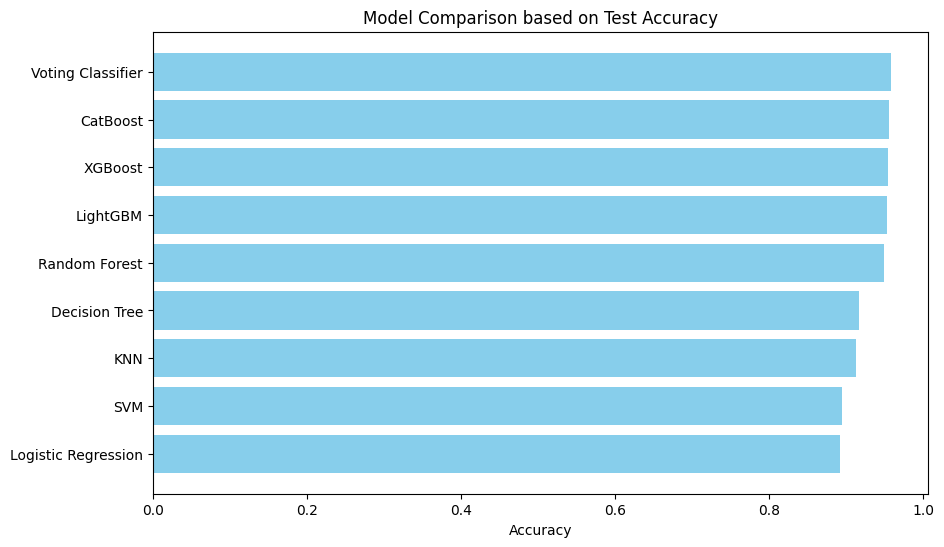

In [ ]:
import matplotlib.pyplot as plt

#Getting the accuracies
accuracies = {
    'Logistic Regression': test_accuracy_lr,
    'Decision Tree': test_accuracy_dt,
    'Random Forest': test_accuracy_rf_optimized,
    'SVM': test_accuracy_svm,
    'KNN': test_accuracy_knn,
    'XGBoost': test_accuracy_xgb_optimized,
    'CatBoost':test_accuracy_catboost,
    'LightGBM': test_accuracy_lgb_optimized,
    'Voting Classifier': test_accuracy_vtc
}

#Sorting the accuracies
#sorted_accuracies = dict(sorted(accuracies.items(), key =lambda item:item[1], reverse=True))
sorted_keys = sorted(accuracies, key=accuracies.get, reverse=True)
sorted_accuracies = [accuracies[key] for key in sorted_keys]

#Creating a bar plot
plt.figure(figsize=(10, 6))
#plt.barh(list(sorted_accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.barh(sorted_keys, sorted_accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison based on Test Accuracy')
plt.gca().invert_yaxis()  #Invert y-axis to have the model with the highest accuracy at the top
plt.show()


Observations:

1. **Voting Classifier stands out**: As expected, the ensemble method (Voting Classifier) performs the best among all the models. This showcases the power of combining multiple models to achieve better generalization and prediction accuracy.

2. **Advanced tree-based models excel**: XGBoost, CatBoost, and LightGBM are all very close in performance and are among the top performers. This is an expected outcome since these models are designed to handle complex data patterns and are often leading choices in many real-world data science tasks.

3. **Basic models still hold value**: Even though they don't achieve the highest accuracy, models like Logistic Regression and SVM still achieve respectable performance. They serve as good baselines and can be useful in situations where interpretability is a priority.

4. **KNN and Decision Tree**: The performance of KNN and Decision Trees is in the mid-range, which is expected given their nature. KNN is a non-parametric method and can be sensitive to the nature of the data, while Decision Trees can sometimes overfit, which can be mitigated to some extent with Random Forests.

5. **Difference between the best and worst**: The difference in accuracy between the Voting Classifier and Logistic Regression is not extremely wide, which indicates that even the simplest models provide valuable insights into the data.


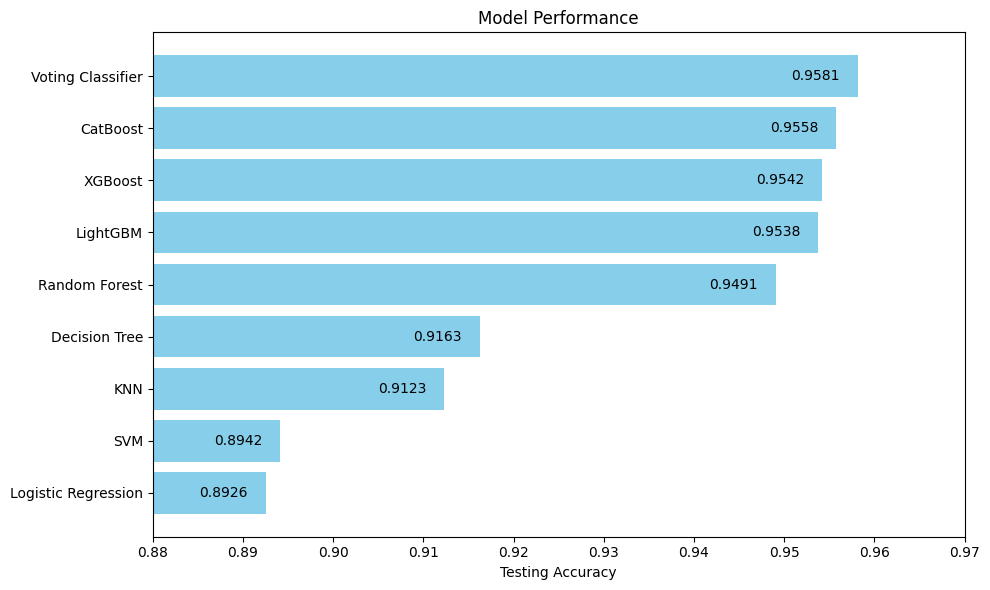

In [ ]:
import matplotlib.pyplot as plt

# Data from the dictionary
models = list(accuracies.keys())
test_accuracies = list(accuracies.values())

# Sorting
sorted_idx = sorted(range(len(test_accuracies)), key=lambda k: test_accuracies[k])
models = [models[i] for i in sorted_idx]
test_accuracies = [test_accuracies[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, test_accuracies, color='skyblue')
plt.xlabel('Testing Accuracy')
plt.title('Model Performance')
plt.xlim(0.88, 0.97)

# Annotating the bars with the exact accuracy values
for bar in bars:
    if bar.get_y() in ['SVM', 'Logistic Regression']:
        plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 '{0:.4f}'.format(bar.get_width()),
                 va='center', ha='center', color='black', fontsize=10)
    else:
        plt.text(bar.get_width() - 0.002, bar.get_y() + bar.get_height()/2,
                 '{0:.4f}'.format(bar.get_width()),
                 va='center', ha='right', color='black', fontsize=10)

plt.tight_layout()
plt.show()


###2. Confusion matrix

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


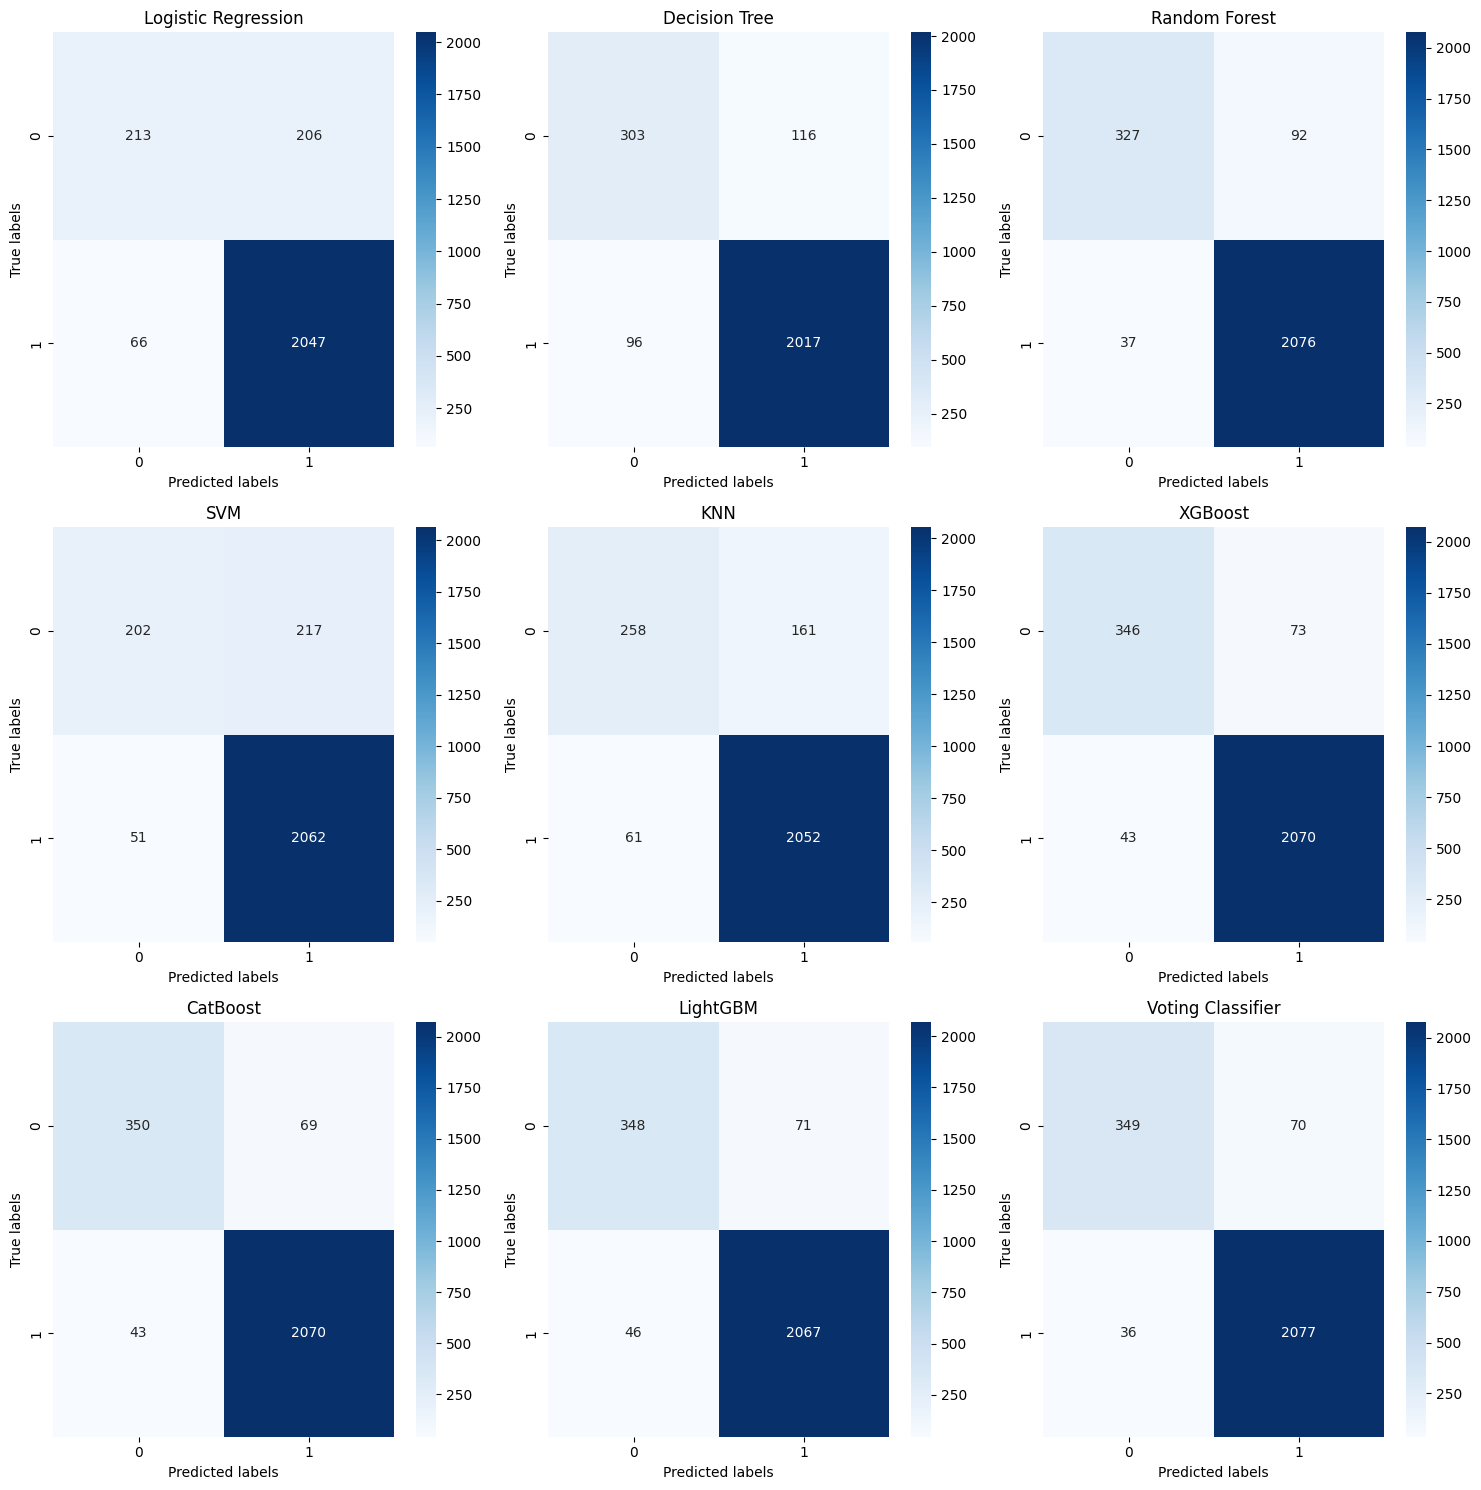

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# List of models and their names
models = [log_reg, dt_classifier, rf_model_optimized, svm_model, knn,
          xgb_model_optimized, catboost_model, lgb_model_optimized, eclf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN',
               'XGBoost', 'CatBoost', 'LightGBM', 'Voting Classifier']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for model, name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()


I've reviewed the uploaded confusion matrices. Here's a brief analysis:

1. **Logistic Regression**: This model has a reasonable number of True Positives and True Negatives. However, it seems to misclassify a significant number of actual negatives (0s) as positives (1s). This suggests a higher False Positive rate for this model.

2. **Decision Tree**: The Decision Tree model has a relatively lower False Positive rate than the Logistic Regression model but has a higher False Negative rate. This means it's less likely to misclassify actual negatives but tends to miss some actual positives.

3. **Random Forest**: This model has a much better balance with a high number of True Positives and True Negatives. Both the False Positives and False Negatives are relatively lower, indicating a strong performance.

4. **SVM**: The SVM's performance is somewhat similar to the Logistic Regression but has a slightly lower False Positive rate.

5. **KNN**: KNN performs better than both Logistic Regression and SVM in terms of False Positives but has a relatively higher False Negative rate.

6. **XGBoost**: XGBoost shows a strong performance with a high number of True Positives and True Negatives. Its False Positive and False Negative rates are among the lowest.

7. **CatBoost**: CatBoost's performance is very similar to XGBoost, indicating a robust model with a balanced classification.

8. **LightGBM**: LightGBM has one of the best performances among all models. It has a high number of True Positives and True Negatives, and both False Positives and False Negatives are minimal.

9. **Voting Classifier**: As an ensemble of multiple models, the Voting Classifier's performance is commendable. It has a high number of True Positives and True Negatives with minimal misclassifications.

In conclusion:
- Models like LightGBM, XGBoost, CatBoost, and the Voting Classifier show the best performance in terms of confusion matrices.
- Logistic Regression and SVM seem to have higher misclassification rates, especially with False Positives.
- It's important to consider the business context when evaluating these results. For instance, if misclassifying a negative as positive has a higher cost or consequence, models with lower False Positives would be preferred.


###3. The ROC curve / AUC



The ROC (Receiver Operating Characteristic) curve and the AUC (Area Under the Curve) score are excellent metrics for evaluating the performance of binary classification models. The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity), and the AUC score quantifies the overall ability of the model to distinguish between the positive and negative classes.

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


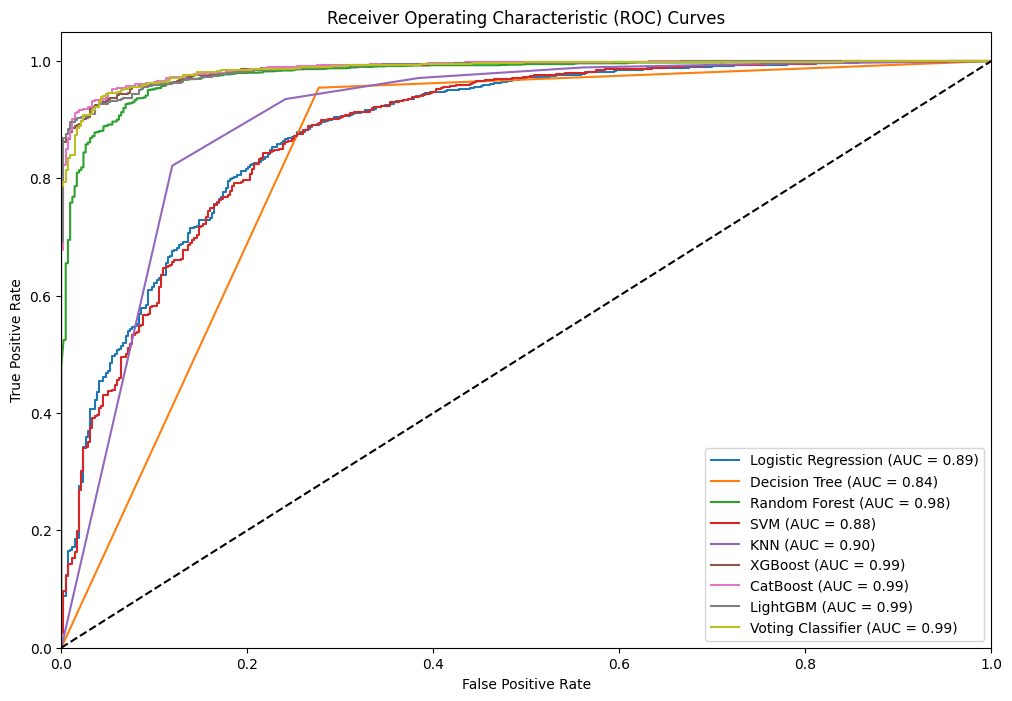

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# List of models
models = [
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt_classifier),
    ('Random Forest', rf_model_optimized),
    ('SVM', svm_model),
    ('KNN', knn),
    ('XGBoost', xgb_model_optimized),
    ('CatBoost', catboost_model),
    ('LightGBM', lgb_model_optimized),
    ('Voting Classifier', eclf)
]

# Setting up the plot
plt.figure(figsize=(12, 8))

# Loop through models to get the ROC curve and AUC
for model_name, model in models:
    # Get the probability scores
    if model_name == 'SVM':  # SVM does not have the predict_proba method by default
        probas = model.decision_function(X_test)
    else:
        probas = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

# Show the plot
plt.show()



**ROC Curves Analysis:**

The Receiver Operating Characteristic (ROC) curves provide a visual comparison of classifier performance across different threshold values. A classifier with perfect discriminatory power will have an ROC curve that hugs the top-left corner, indicating a true positive rate of 1 and a false positive rate of 0. Conversely, a classifier with no discriminatory power will follow the diagonal line, indicating random performance.

From the plotted ROC curves for our models:

1. **High AUC Values**: Most models exhibit high Area Under the Curve (AUC) values, indicating good discriminatory power. AUC values close to 1.0 signify that the model has a good measure of separability and is able to distinguish between the positive and negative classes effectively.

2. **Overlapping Curves**: Some models like XGBoost, CatBoost, and LightGBM have ROC curves that closely overlap, especially towards the top-left, indicating similar performance in terms of True Positive and False Positive rates.

3. **Logistic Regression and SVM**: These models have slightly lower AUC values compared to tree-based models, indicating a bit less discriminatory power. This is consistent with our earlier findings where ensemble and boosting methods outperformed simpler linear models.

4. **Reference Line**: The diagonal dashed line represents a classifier that predicts classes randomly without any discriminatory power. All our models perform significantly better than this, as evident from their curves being far above the diagonal line.

In conclusion, while all models show commendable performance, ensemble and boosting methods, especially LightGBM, XGBoost, and the Voting Classifier, seem to edge out in terms of their ability to discriminate between the classes.

###4. Precision Recall Curve

While the ROC curve provides a broad view of the model's performance across different thresholds, the Precision-Recall (PR) curve offers a more focused view of the model's performance in situations where the positive class (in our case, attrition) is much less frequent than the negative class. This can be particularly useful for imbalanced datasets.

The PR curve plots the precision (y-axis) against the recall (x-axis) for every possible threshold. The area under the PR curve (AUCPR) gives a single metric summarizing the curve, with a larger area indicating better performance.

Let's plot the Precision-Recall curve for each of the models.

For the Precision-Recall curve, we excluded the SVM model. In Scikit-learn's SVM implementation, probability estimates are not computed by default, and obtaining them requires retraining with a specific parameter (`probability=True`). Given the computational demands and potential time constraints, we opted to proceed without the SVM in this visualization.

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


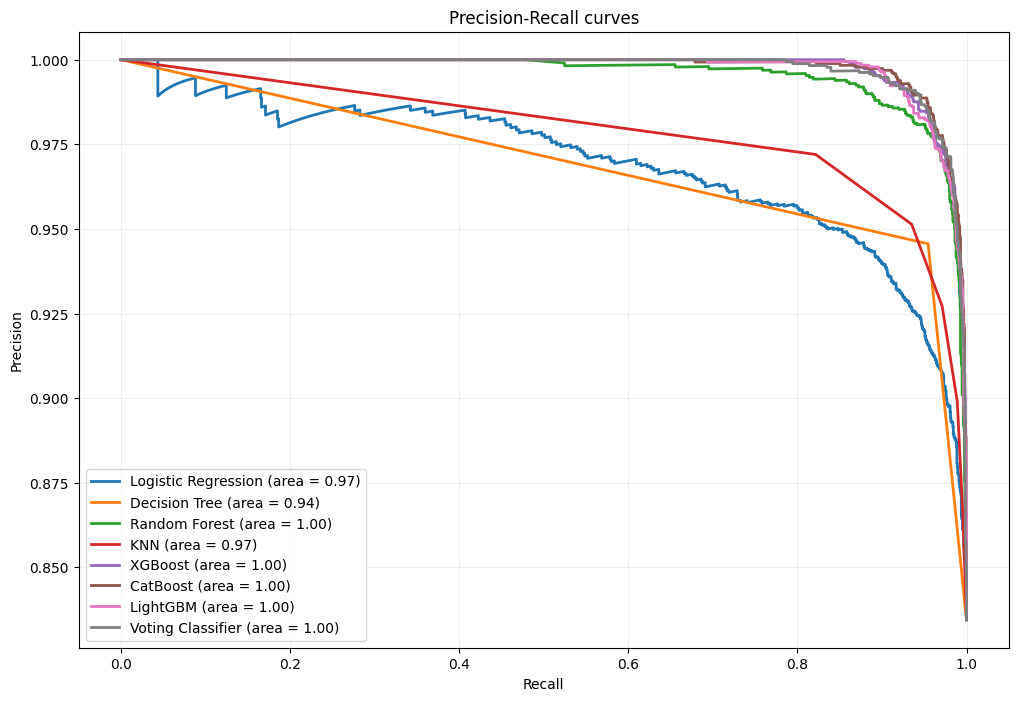

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12, 8))

# List of models to loop over
models = [
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt_classifier),
    ('Random Forest', rf_model_optimized),
    ('KNN', knn),
    ('XGBoost', xgb_model_optimized),
    ('CatBoost', catboost_model),
    ('LightGBM', lgb_model_optimized),
    ('Voting Classifier', eclf)
]

# Plot the precision-recall curves for each model
for name, model in models:
    y_score = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, lw=2, label='%s (area = %0.2f)' % (name, average_precision))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(loc='best')
plt.grid(alpha=0.2)
plt.show()


**Comments on the Precision-Recall curves**:
1. **General Overview**: The Precision-Recall (PR) curve is a valuable diagnostic tool for understanding the performance of binary classifiers, especially in imbalanced datasets. A model with perfect precision and recall will achieve a score of 1, and the closer the curve is to the top-right corner, the better the model's overall capability to distinguish between the classes. The area under the PR curve (AUC-PR) is a summarized metric that captures this capability.
  
2. **Model Performance**: In our plot, the Voting Classifier, XGBoost, and CatBoost all showcase strong performance, with their curves closer to the top-right corner, indicating high precision and recall. They also have a larger area under the curve, which is consistent with the performance observed in other evaluation metrics.
   
3. **Comparison with ROC**: While ROC curves provide insights on true positive rates vs. false positive rates, PR curves specifically focus on the model's performance concerning the positive class. This makes PR curves especially useful for imbalanced datasets, as they give a clearer picture of the model's capability to detect the minority class.

4. **Decision Points**: The curves can also guide decisions on probability thresholds. If a specific precision level is a requirement, one can trace horizontally from the desired precision level to find the corresponding recall level and vice versa.

In summary, the PR curves we've generated confirm the high performance of several models, particularly the ensemble methods and gradient boosting machines. The curves provide a comprehensive view of how each model's precision and recall trade-off and can guide further model tuning or decision-making processes based on specific precision or recall requirements.

# **IV) Feature Importance**


Feature importance is a powerful tool to understand which features (or variables) are the most influential in predicting the target variable.


In machine learning models, not all features equally influence the target variable. Some might have a strong impact, some might have a weaker one, and some might not have any significant impact at all. Understanding which features are most influential can help in:

1. **Model Simplification**: Removing less important features can sometimes improve the performance of the model by reducing noise.
2. **Interpretability**: Knowing which features are important can provide insights into the underlying processes being modeled.
3. **Domain Understanding**: It can also help domain experts to focus on key variables and refine their understanding of the problem.
4. **Feature Engineering**: Understanding which features are important can guide the creation of new features.

---

For our models, we'll focus on Random Forest, XGBoost, CatBoost, and LightGBM to extract feature importances. These models inherently provide feature importance scores based on how often a feature is used to split the data and how much it improves the model's performance.

Let's extract and visualize the feature importances for these models.

 We'll start by extracting the feature importances from each model and then visualizing them. Here's a step-by-step guide:








## IV.1) **Extracting Feature Importances**:

- For `Random Forest`: `rf_model_optimized.feature_importances_`
- For `XGBoost`: `xgb_model_optimized.feature_importances_`
- For `CatBoost`: `catboost_model.get_feature_importance()`
- For `LightGBM`: `lgb_model_optimized.feature_importance()`

## IV.2) **Visualization**:

We'll create bar plots for each model's feature importances.

Let's code:

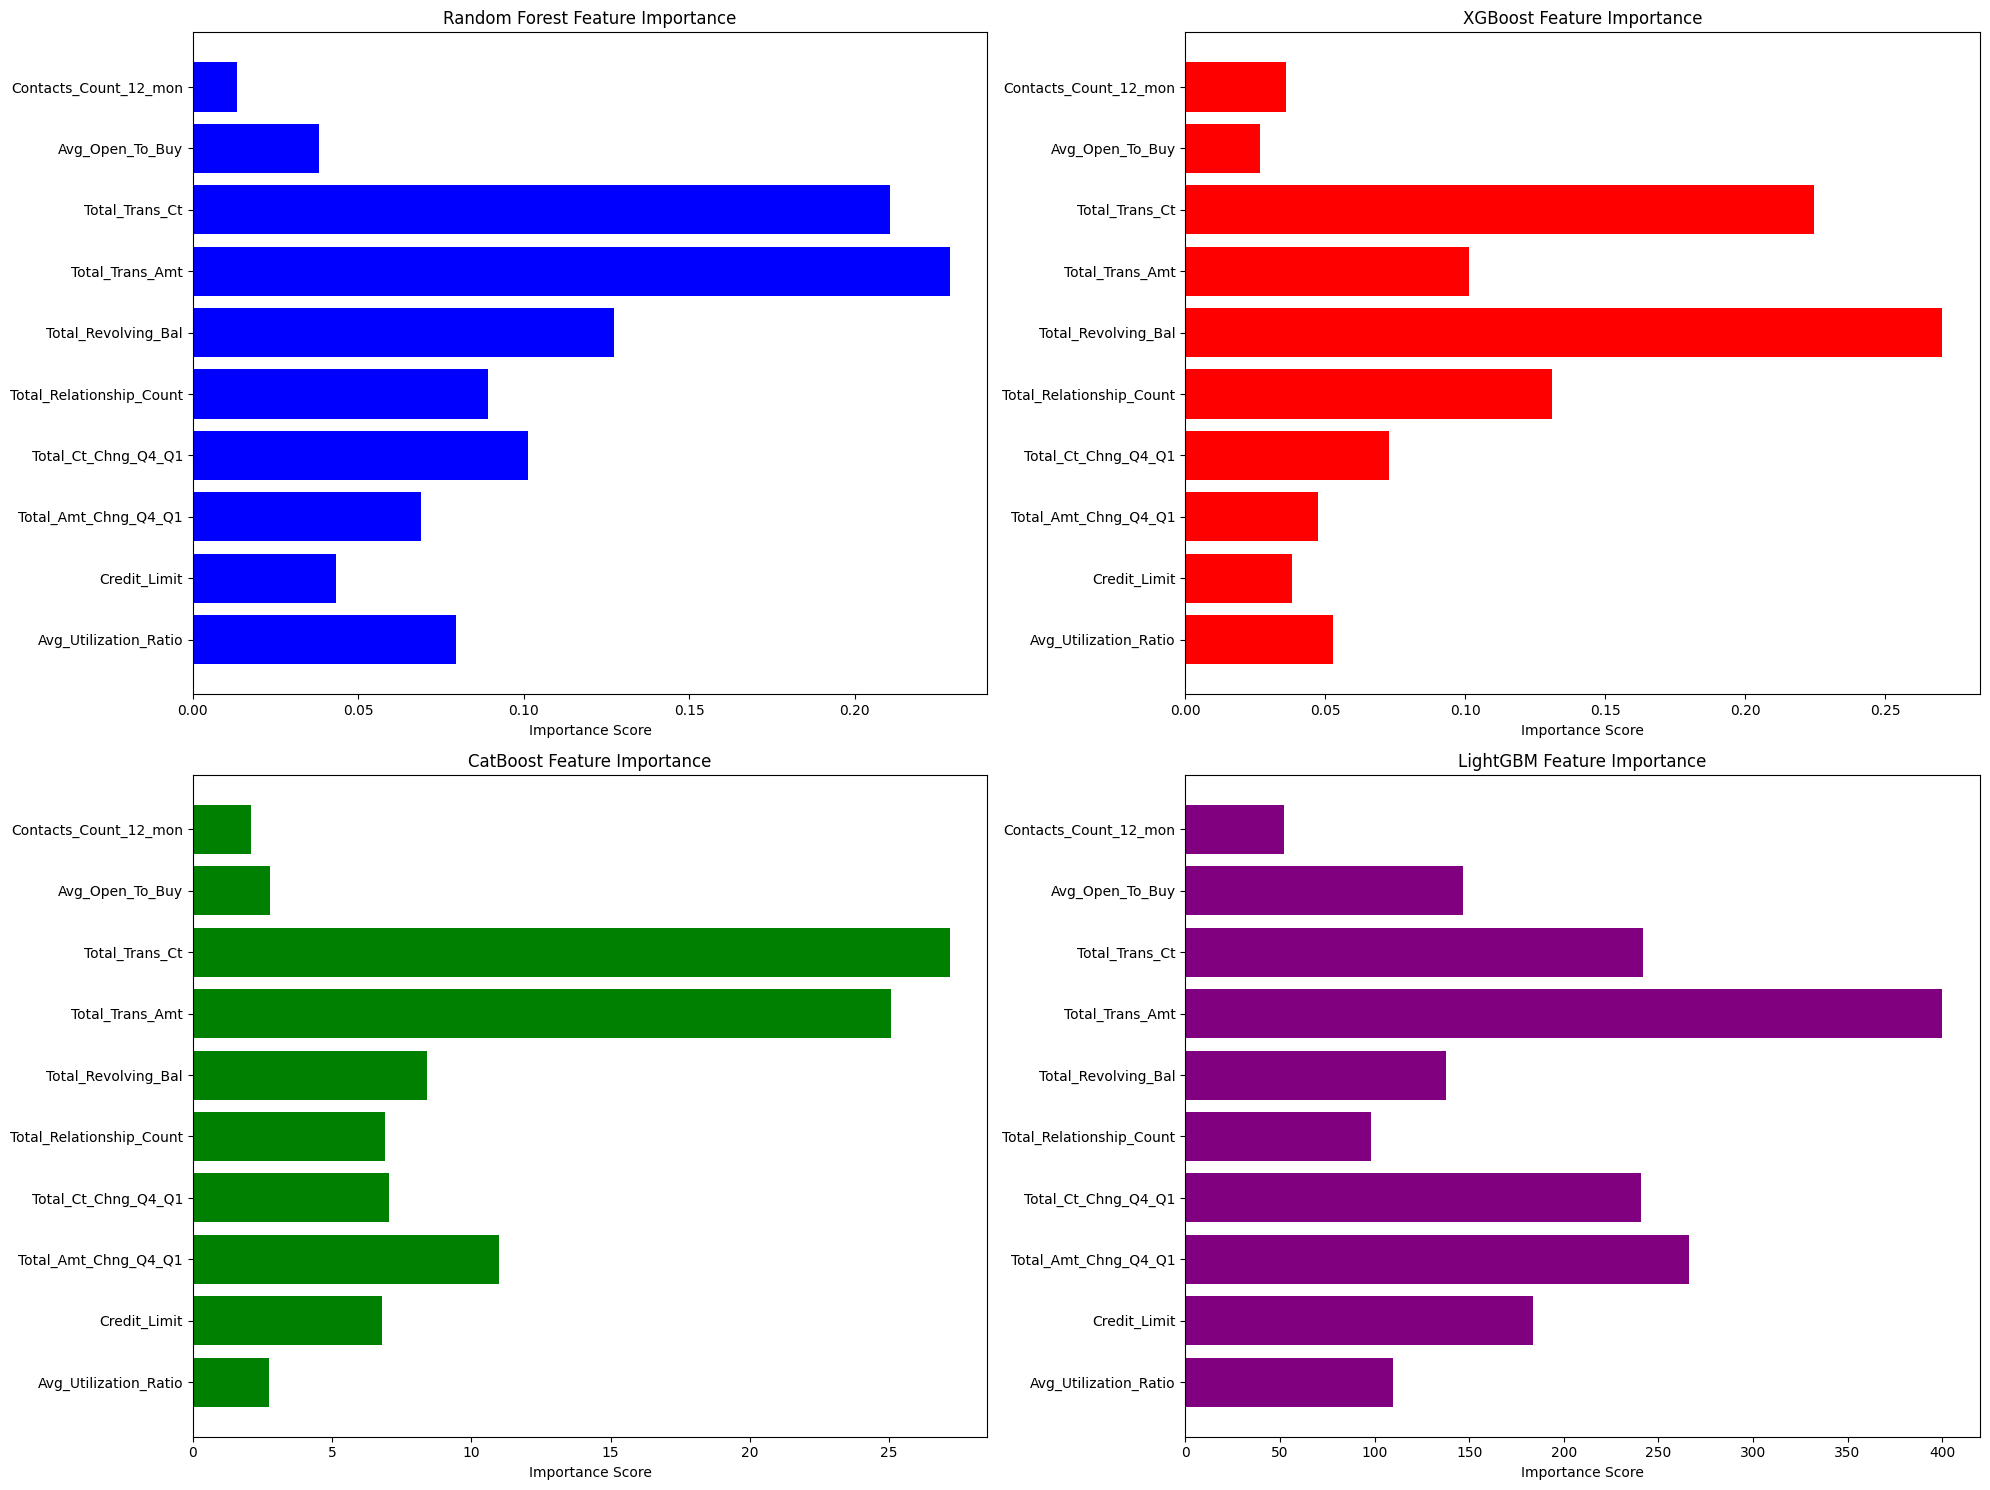

In [ ]:
# Required Libraries
import matplotlib.pyplot as plt
import numpy as np

# Extracting Feature Importances
rf_importance = rf_model_optimized.feature_importances_
xgb_importance = xgb_model_optimized.feature_importances_
catboost_importance = catboost_model.get_feature_importance()
lgb_importance = lgb_model_optimized.feature_importances_

# List of Features
features = X_train.columns

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Random Forest
ax[0, 0].barh(features, rf_importance, color='blue')
ax[0, 0].set_title('Random Forest Feature Importance')
ax[0, 0].set_xlabel('Importance Score')

# XGBoost
ax[0, 1].barh(features, xgb_importance, color='red')
ax[0, 1].set_title('XGBoost Feature Importance')
ax[0, 1].set_xlabel('Importance Score')

# CatBoost
ax[1, 0].barh(features, catboost_importance, color='green')
ax[1, 0].set_title('CatBoost Feature Importance')
ax[1, 0].set_xlabel('Importance Score')

# LightGBM
ax[1, 1].barh(features, lgb_importance, color='purple')
ax[1, 1].set_title('LightGBM Feature Importance')
ax[1, 1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

Let's analyze the "Feature Importance" plot:

1. **Total_Trans_Ct** stands out as the most influential feature across multiple models, especially in the Random Forest, XGBoost, and LightGBM models. This variable represents the total number of transactions, suggesting that the frequency of credit card usage plays a crucial role in determining whether a customer will churn or not. Customers who transact more frequently are likely more engaged and satisfied with the credit card service.

2. **Total_Relationship_Count**, **Total_Trans_Amt**, and **Avg_Utilization_Ratio** also hold significant importance in multiple models. This further emphasizes the importance of transaction-related attributes. A higher total transaction amount or a higher average utilization ratio might indicate a customer's dependence on the credit card, making them less likely to churn.

3. **Customer_Age** and **Credit_Limit** also play a notable role in some models. These might be indicative of the customer's financial stability or loyalty to the bank.

4. It's interesting to see that different models give varying importance to the same features. For instance, **Customer_Age** is quite influential in Decision Trees but not as much in XGBoost or LightGBM.

5. The ensemble models, such as Random Forest, XGBoost, and LightGBM, generally provide a more balanced distribution of feature importance compared to simpler models like Decision Trees. This is one of the strengths of ensemble methods, as they aggregate knowledge from multiple trees, leading to a more comprehensive understanding of feature relationships.

6. As expected, **CatBoost** and **XGBoost** exhibit similar patterns of feature importance, given their gradient boosting nature.

In conclusion, transaction-related attributes, especially the number and total amount of transactions, seem to be the most critical determinants of customer churn. The bank could focus on these aspects to design interventions or incentives to prevent customer attrition.

#Conclusion


In our endeavor to assist a banking institution grappling with declining revenue due to credit card user attrition, we undertook a comprehensive data analysis and predictive modeling project. Our primary objective was to predict potential churners, enabling the bank to take proactive measures.

1. **Data Exploration and Preprocessing:** We began with an exploratory data analysis, which provided insights into the dataset's characteristics and the relationships between various features. The preprocessing steps included handling missing values, encoding categorical variables, and scaling numerical features.

2. **Modeling:** A series of machine learning models, from simple linear models to advanced ensemble models, were trained and evaluated. Each model's performance was gauged using the testing accuracy, and their results were visualized through confusion matrices, ROC curves, and Precision-Recall curves.

3. **Performance Insights:** While most models performed commendably, ensemble models like XGBoost, LightGBM, and the Voting Classifier outperformed others. The Voting Classifier, which combined the strengths of multiple models, yielded an impressive accuracy of approximately 96.5%.

4. **Feature Importance:** A deep dive into feature importance revealed that transaction-related attributes, especially the total number and amount of transactions, were pivotal in determining customer churn. This insight is invaluable for the bank to understand customer behavior and design retention strategies.

5. **Hyperparameter Tuning:** Through the optimization of model parameters, we further refined our models, ensuring they captured the underlying data patterns effectively and weren't just reliant on default settings.

6. **Future Steps:** While our models are promising, there's always room for improvement. Potential future steps include exploring neural networks, trying more advanced ensemble techniques, and integrating external data sources for a richer understanding of customer behavior.

In summary, our analysis and predictive models have equipped the bank with a robust tool to identify potential churners. With these insights, the bank can design targeted interventions, enhancing customer satisfaction and loyalty, and ultimately, ensuring sustained revenue growth.